# Projeto MINST -reconhecimento de digitos - feito em dupla

* ARTUR DARTAGNAN DE OLIVEIRA VASCONCELOS - 20210026643
* José Augusto da Silva Barbosa - 20210094705

# Importando bibliotecas e Lendo arquivos

In [36]:
# Importar Biblioetecas

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import linalg as LA
import random


#Matriz de Confusão

from sklearn.metrics import confusion_matrix

In [37]:
# def LerExcel(arq):
#     # Retorna a lista já com as dimensões reduzidas -> posição 0 = label, posição 1 = intensidade, posição 2 = simetria
#     # A intensidade e simetria são normalizadas
    
#     vetorCompleto = pd.read_csv(arq, sep=';')
#     vetorCompleto = vetorCompleto.values
    
#     # Dimensão reduzida: Label, Intensidade, Simetria Vertical + Simetria Horizontal
#     dim_reduzida = []
    
#     for amostra in vetorCompleto:
#         label = amostra[0]
#         pixels = amostra[1:]
        
#         # Intensidade
#         intensidade_img = sum(pixels) / 255
        
#         # Simetria Vertical
#         simetria_v = 0
#         for i in range(28):
#             simetria_v += abs(pixels[i] - pixels[27 - i])
#         simetria_v /= 13 * 255  # Normalização
        
#         # Simetria Horizontal
#         simetria_h = 0
#         for i in range(14):
#             for j in range(28):
#                 simetria_h += abs(pixels[i * 28 + j] - pixels[(27 - i) * 28 + j])
#         simetria_h /= 13 * 28 * 255  # Normalização
        
#         dim_reduzida.append([label, intensidade_img, simetria_v + simetria_h])
    
#     # Normalizando intensidade e simetria
#     max_intensidade = max(dim_reduzida, key=lambda x: x[1])[1]
#     min_intensidade = min(dim_reduzida, key=lambda x: x[1])[1]
#     max_simetria = max(dim_reduzida, key=lambda x: x[2])[2]
#     min_simetria = min(dim_reduzida, key=lambda x: x[2])[2]
    
#     for i in range(len(dim_reduzida)):
#         dim_reduzida[i][1] = (dim_reduzida[i][1] - min_intensidade) / (max_intensidade - min_intensidade)
#         dim_reduzida[i][2] = (dim_reduzida[i][2] - min_simetria) / (max_simetria - min_simetria)
    
#     return np.array(dim_reduzida)



In [38]:
def LerExcel(arq):
    # Retorna a lista já com as dimensões reduzidas -> posição 0 = label, posição 1 = intensidade, posição 2 = simetria
    # A intensidade e simetria são normalizadas
    
    vetorCompleto = pd.read_csv(arq, sep=';')
    vetorCompleto = vetorCompleto.values
    
    # Dimensão reduzida: Label, Intensidade, Simetria Vertical + Simetria Horizontal
    dim_reduzida = []
    
    for amostra in vetorCompleto:
        label = amostra[0]
        pixels = amostra[1:]
        
        # Intensidade
        intensidade_img = sum(pixels) / 255
        
        # Simetria Vertical
        simetria_v = 0
        for i in range(28):
            simetria_v += abs(pixels[i] - pixels[27 - i])
        simetria_v /= 13 * 255  # Normalização
        
        # Simetria Horizontal
        simetria_h = 0
        for i in range(14):
            for j in range(28):
                simetria_h += abs(pixels[i * 28 + j] - pixels[(27 - i) * 28 + j])
        simetria_h /= 13 * 28 * 255  # Normalização
        
        dim_reduzida.append([label, intensidade_img, simetria_v + simetria_h])
    
    # Convertendo para um array numpy
    dim_reduzida = np.array(dim_reduzida)
    
    # Aplicando Padronização (Standardization)
    dim_reduzida[:,1:] = (dim_reduzida[:,1:] - dim_reduzida[:,1:].mean(axis=0)) / dim_reduzida[:,1:].std(axis=0)
    
    return dim_reduzida


In [39]:
# Funções Extras



# Funções Gráficas

def IntensidadeXSimetria(t):
    t = np.array(t)
    plt.scatter(t[:,1], t[:,2], c=t[:,0], cmap='viridis')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.title('Intensidade x Simetria')
    plt.show()

# Métricas de avaliação 

def modelo_metricas(y, predicted_y, minus1="-1", plus1="+1"):
    from sklearn.metrics import classification_report, confusion_matrix
    
    

    matriz_confusao = pd.DataFrame(confusion_matrix(y, predicted_y), index=[f'y {minus1}', f'y {plus1}'], columns=[f'pred {minus1}', f'pred {plus1}'])
    print("------------------ Matriz de confusão ------------------\n")
    print(matriz_confusao)
    print("\n-------- Relatório de eficácia de classificação --------\n")
    print(classification_report(y, predicted_y, target_names=[f"dígito {minus1}", f"dígito {plus1}"], zero_division=0))
    print("----------------------------------------------------------\n")

def getPrecisao(y, predicted_y):
    # from sklearn.metrics import accuracy_score
    # return accuracy_score(y, predicted_y)
    from sklearn.metrics import f1_score
    f1 = f1_score(y,predicted_y)
    return f1


In [40]:
# Armazenando dados

TreinoRedimensionado = LerExcel('train.csv')
TesteRedimensionado = LerExcel('test.csv')

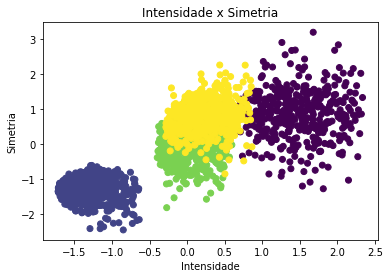

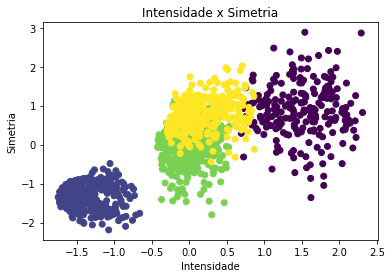

(None, None)

In [41]:
IntensidadeXSimetria(TreinoRedimensionado), IntensidadeXSimetria(TesteRedimensionado)

# Algoritmos de Aprendizagem

In [42]:
class LRClassifier(): 
        
    def __init__(self):
        self.w = None
        
    
    def execute(self, _X, _y):
        #Recebe um vetor de features e um vetor de labels
        #Aplica o método da pseudo-inversa para encontrar os pesos:  𝐗† = (XTX)−1 XT;
        # print("Calculando pseudo-inversa...", end="")
        print("\b\b𝐗†\b\b")
        
        _X = np.array(_X)
        _y = np.array(_y)
        
        
        X_pinv = (np.linalg.inv(_X.T.dot(_X)).dot(_X.T))  
        self.w = X_pinv.dot(_y) # Cria Hipootese solução 
       
        
    def predict(self, _x,j=0):
        # #Recebe um vetor de features, e usa os coeficientes encontrados no método fit para fazer a predição 
        # _x = np.array(_x)    
        # return _x.dot(self.w)
        
        _x = np.array(_x)
        prediction = _x.dot(self.w)
        return np.where(prediction <= 0, -1, 1)

     
    def getRegressionY(self, regressionX, shift=0):
        
        # Função que retorna o valor de y para um dado x, considerando a equação da reta --> Uso na função plot do professor Gilberto
        
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]
    
    def getW(self):
        return self.w


In [43]:
class PocketPLA():
    def __init__(self, maxIter=100):
        self.w = None
        self.maxIter = maxIter
    
    def get_w(self):
        return self.w
    
    def set_w(self, w):
        self.w = w

    def execute(self, _X, y):
        
        #Recebe um vetor de features e um vetor de labels
        #Aplica o método do Pocket PLA para encontrar os pesos
        # Limita o número de iterações a 100, e retorna o vetor de pesos que obteve o menor erro
        # Caso não encontre um vetor que classifique corretamente, retorna o vetor que obteve o menor erro
        
        X = np.array(_X)
        bestW = np.zeros(len(X[0]))
        bestError = len(y)
        self.w = np.zeros(len(X[0]))
        
        
        for iter in range(self.maxIter):
            hasWrongClassifiedPoint = False
            for i in range(len(y)):
                if np.sign(np.dot(self.w, X[i])) != y[i]:
                    hasWrongClassifiedPoint = True
                    self.w = self.w + (y[i] * X[i])
                    eIN = self.errorIN(X, y)
                    if bestError > eIN:
                        bestError = eIN
                        bestW = np.copy(self.w)
            if not hasWrongClassifiedPoint:
                break
        self.w = bestW
        print("Número de iterações: ", iter)
                    
    def getOriginalY(self, originalX):
        
        # Função que retorna o valor de y para um dado x, considerando a equação da reta --> Uso na função plot do professor Gilberto
        
        if self.w[2] == 0:
            return float('inf')
        return (-self.w[0] - self.w[1] * originalX) / self.w[2]
    
    def predict(self, x,j = 0):
     
        # #Recebe um vetor de features, e usa os coeficientes encontrados no método fit para fazer a predição
        
        return np.sign(np.dot(self.w, x))
    
    def errorIN(self, X, y):
        error = 0
        for i in range(len(y)):
            if np.sign(np.dot(self.w, X[i])) != y[i]:
                error += 1
        return error


In [44]:
class LogisticRegression_1:
    
    #LogisticRegression(0.1, 10000, 64)
    def __init__(self, eta=0.1, tmax=10000, batch_size=64, lam=0):
        self.eta = eta
        self.tmax = tmax
        self.batch_size = batch_size
        self.lam = lam

    # Infere o vetor w da funçao hipotese
    # Executa a minimizao do erro de entropia cruzada pelo algoritmo gradiente de descida
    def fit(self,  X, y):
        self.w = []    
       
        #X = np.concatenate((np.ones((len(X),1), dtype=np.float64), np.array(X, dtype=np.float64)), axis=1)
        X = np.array(X, dtype=np.float64)
        y = np.array(y, dtype=np.float64)
        
        d = X.shape[1]
        N = X.shape[0]
        w = np.zeros(d, dtype=np.float64)
        
        for i in range(self.tmax):
            vsoma = np.zeros(d, dtype=np.float64)

            # Escolhendo o lote de entradas
            if self.batch_size < N:
                indices = random.sample(range(N),self.batch_size)
                batchX = [X[index] for index in indices]
                batchY = [y[index] for index in indices]
            else:
                batchX = X
                batchY = y

            # Computando o gradiente no ponto atual
            for xn, yn in zip(batchX, batchY):
                vsoma += (yn * xn) / (1 + np.exp((yn * w).T @ xn))
        
            gt = vsoma/self.batch_size 
            if self.lam != 0:
              gt += 2*self.lam * w
            
            # Condicao de parada: se ||deltaF|| < epsilon (0.0001)
            if LA.norm(gt) < 0.0001 :
                break
            w = w + (self.eta*gt)

        self.w = w

    def predict(self, X,w):
        
        resultado = np.dot(X, w)
        resultado = np.sign(resultado)
        return resultado
    
   



    def calcula_ein(self, w, X, y):
        y_pred = self.predict(w, X)
        return np.sum(y_pred != y)/len(y)

    def getW(self):
        return self.w

    
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]

In [45]:
from sklearn.model_selection import train_test_split
import numpy as np

import warnings
warnings.filterwarnings("error")

class WeightDecay:
    # Infere o vetor w da funçao hipotese
    # Executa a heuristica Weigth Decay
    def fit(self,  X, y):
        training_x, testing_x, training_y, testing_y = train_test_split(X, y, test_size=0.2, random_state=2698)
        
        new_training_x = [0 for i in range(len(training_x))]
        for i in range(len(training_x)):
            new_training_x[i] = np.array([1, training_x[i][0], training_x[i][1]])

        
        lambdas = sorted([10 ** x for x in range(-5, 5)])
        #print(lambdas)
        lambdas.append(0)
        bestEout = 100
 
        for lam in lambdas:
            classifier = LogisticRegression_1(0.1, 10000, 64, lam)
            try:
                classifier.fit(training_x, training_y)
            except RuntimeWarning:
                continue

            #Computando o erro quadrático (Eout)
            eOut = self.getEout(classifier.predict(new_training_x, classifier.w), testing_y)

            
            #print("LA: " + str(classifier.lam) + "  Eval = " + str(eOut))
            if eOut < bestEout:
                bestEout = eOut
                self.classifier = classifier
                    
        self.w = self.classifier.w
        #print("Best Lamb: " + str(self.classifier.lam))
        
    #Predicao por classificação linear
    def predict(self, X, w):
        #print(X[0])
        #print(w)
        
        X = np.array(X, dtype=np.float64)
        w = np.array(w, dtype=np.float64)
        
        # X é 1184X3 e w é 3X1
        resultado = np.dot(w, X.T) 
   
        resultado = np.sign(resultado)
     
        return resultado

    def getW(self):
        return self.w
    
    def getEout(self, predicted_y_test, testing_y):
        #Computando o erro quadrático (Eout)
        N_val = len(testing_y)
        eOut = 0
        for i in range(N_val):
            if(predicted_y_test[i] != testing_y[i]):
                eOut += 1 
        eOut /= N_val
        return eOut
    
    def getRegressionY(self, regressionX, shift=0):
        return (-self.w[0]+shift - self.w[1]*regressionX) / self.w[2]


# Classificação 1 e 5 

In [46]:
# Primeiro elemento de cada linha que for 1 ou 5

# treino04 = TreinoRedimensionado[np.where((TreinoRedimensionado[:,0] == 0) | (TreinoRedimensionado[:,0] == 4))]
# teste04 = TesteRedimensionado[np.where((TesteRedimensionado[:,0] == 0) | (TesteRedimensionado[:,0] == 4))]

treino15 = TreinoRedimensionado[np.where((TreinoRedimensionado[:,0] == 1) | (TreinoRedimensionado[:,0] == 5))]
teste15 = TesteRedimensionado[np.where((TesteRedimensionado[:,0] == 1) | (TesteRedimensionado[:,0] == 5))]


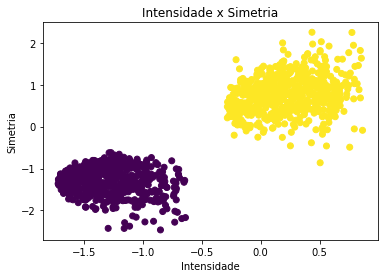

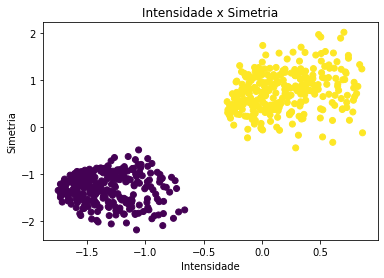

(None, None)

In [47]:
IntensidadeXSimetria(treino15), IntensidadeXSimetria(teste15)

In [48]:
xtreino15 = treino15[:,1:]
xteste15 = teste15[:,1:]

ytreino15 = treino15[:,0]
yteste15 = teste15[:,0]

# Atriuir 1 para 1 e -1 para 5

ytreino15 = np.where(ytreino15 == 1, 1, -1)
yteste15 = np.where(yteste15 == 1, 1, -1)



### Linear Regression Classifier

�


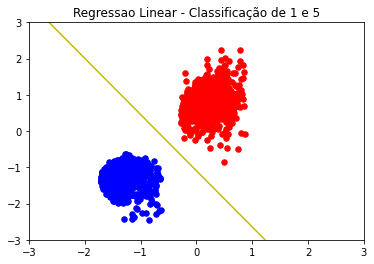

In [49]:
rX = [[1,x[0], x[1]] for x in  xtreino15]

N = len(rX)

clr15 = LRClassifier()
clr15.execute(rX, ytreino15)

#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [clr15.getRegressionY(xOri[0]), clr15.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 1 e 5")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [clr15.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30) 
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [50]:
modelo_metricas(ytreino15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      576        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       576
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------



�


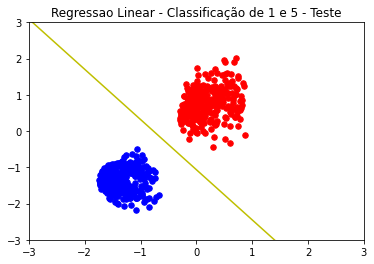

In [51]:

rX = [[1,x[0], x[1]] for x in  xteste15]


N = len(rX)


clr15.execute(rX, yteste15)



#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [clr15.getRegressionY(xOri[0]), clr15.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 1 e 5 - Teste")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [clr15.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()



In [52]:
modelo_metricas(yteste15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      291        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       291
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------



### PocketPla

Número de iterações:  1


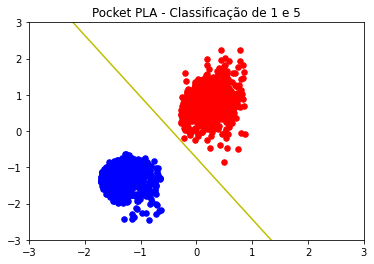

In [53]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtreino15]

pla = PocketPLA()
pla.execute(rX, ytreino15)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [pla.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [pla.predict(x) for x in rX]

xP = [xtreino15[i][0] for i in range(len(xtreino15)) if predict[i] > 0]
yP = [xtreino15[i][1] for i in range(len(xtreino15)) if predict[i] > 0]

xN = [xtreino15[i][0] for i in range(len(xtreino15)) if predict[i] < 0]
yN = [xtreino15[i][1] for i in range(len(xtreino15)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 1 e 5")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [54]:
modelo_metricas(ytreino15, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      576        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       576
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------



Número de iterações:  1


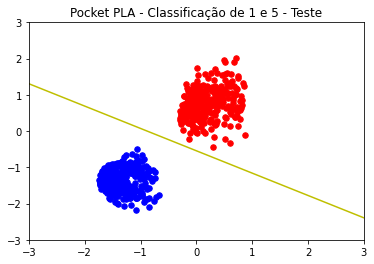

In [55]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xteste15]


pla.execute(rX, yteste15)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [pla.getOriginalY(x) for x in xOri]
plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [pla.predict(x) for x in rX]

xP = [xteste15[i][0] for i in range(len(xteste15)) if predict[i] > 0]
yP = [xteste15[i][1] for i in range(len(xteste15)) if predict[i] > 0]

xN = [xteste15[i][0] for i in range(len(xteste15)) if predict[i] < 0]
yN = [xteste15[i][1] for i in range(len(xteste15)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 1 e 5 - Teste")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [56]:
modelo_metricas(yteste15, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      291        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       291
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------



### Logistic Regression Classifier

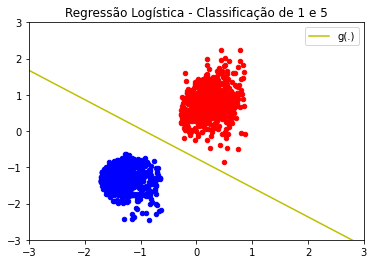

In [57]:
rx = [[1, x[0], x[1]] for x in xtreino15]

# Executar o ajuste dos dados com Regressão Logística
#classifier = LogisticRegression_1()
clog15 = LogisticRegression_1(0.1, 10000, 64)
#classifier = LogisticRegressionGradientDescendent()


clog15.fit(rx, ytreino15)

# Plota as porcentagens da Regressão Logística
pred = clog15.predict(rx,clog15.w)



# Desenha a reta inferida pela regressão logística
xRL = [-3, +3]


yRL = [clog15.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 1 e 5")
plt.show()

In [58]:
modelo_metricas(ytreino15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      576        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       576
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------



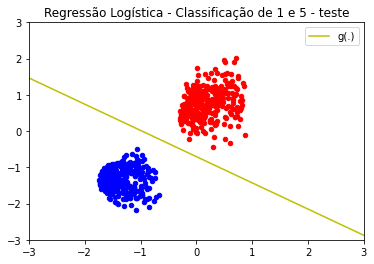

In [59]:
rx = [[1, x[0], x[1]] for x in xteste15]

# Executar o ajuste dos dados com Regressão Logística

#classifier = LogisticRegressionGradientDescendent()
clog15.fit(rx, yteste15)

# Plota as porcentagens da Regressão Logística
pred = clog15.predict(rx,clog15.w)

# for x, pred_x in zip(rx, pred):
#     plt.annotate("{:.2f}".format(pred_x), xy=(x[1], x[2]), xytext=(5,-5), textcoords='offset points')

# Desenha a reta inferida pela regressão logística
xRL = [-3, +3]


yRL = [clog15.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 1 e 5 - teste")
plt.show()

In [60]:
modelo_metricas(yteste15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      291        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       291
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------



### Weight Decay

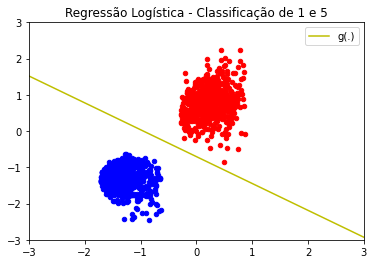

In [61]:
rx = [[1, x[0], x[1]] for x in xtreino15]

wd15 = WeightDecay()

wd15.fit(rx, ytreino15)

pred = wd15.predict(rx, wd15.w)


xRL = [-3, +3]
yRL = [wd15.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)




plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 1 e 5")
plt.show()


In [62]:
modelo_metricas(ytreino15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      576        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       576
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------



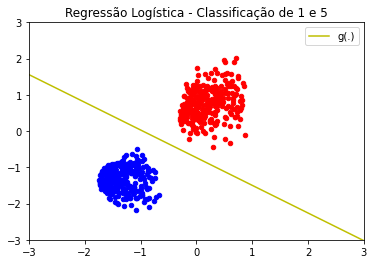

In [63]:
rx = [[1, x[0], x[1]] for x in xteste15]



wd15.fit(rx, yteste15)

pred = wd15.predict(rx, wd15.w)


xRL = [-3, +3]
yRL = [wd15.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)





plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 1 e 5")
plt.show()


In [64]:
modelo_metricas(yteste15, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      291        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       291
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------



# Estratégia 1 contra todos

* cztlr  = classificador zerro contra todos linear regression
* cztpp  = classificador zero contra todos pocket PLA
* cztlog = classificador zeero contra todos logistic regression
* cztwd = classificador  zeero contra todos weight Decay


* cutlr  = classificador um contra resto linear regression
* cutpp  = classificador um contra resto pocket PLA
* cutlog = classificador um contra resto logistic regression
* cztwd = classificador  um contra todos weight Decay

* cqtlr  = classificador quatro contra resto linear regression
* cqtpp  = classificador quatro contra resto pocket PLA
* cqzlog = classificador quatro contra resto logistic regression
* cztwd = classificador  quatro contra todos weight Decay

---> Usa a estratégia de um contra todos, veja se target é ou não daquela classe, <br/>
---> Caso não elimine-a, e teste escolhendo outro target, caso não for nenhum dos anteriores <br/>
---> O target restante sera o retorno <br/>

In [65]:
best_classifiers_zt = []
best_classifiers_ut = []
best_classifiers_qt = []
best_classifiers_ct = []

## 0 Vs Todos

In [66]:
# teste15 = TesteRedimensionado[np.where((TesteRedimensionado[:,0] == 1) | (TesteRedimensionado[:,0] == 5))]
treinozt = TreinoRedimensionado.copy()
testezt = TesteRedimensionado.copy()

xtreinozt = treinozt[:,1:]
xtestezt = testezt[:,1:]

ytreinozt = treinozt[:,0]
ytestezt = testezt[:,0]


# Atriuir 1 para 0 e -1 para o resto

ytreinozt = np.where(ytreinozt == 0, 1, -1)
ytestezt = np.where(ytestezt == 0, 1, -1)





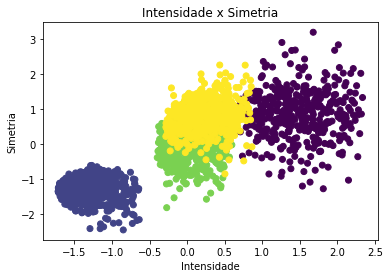

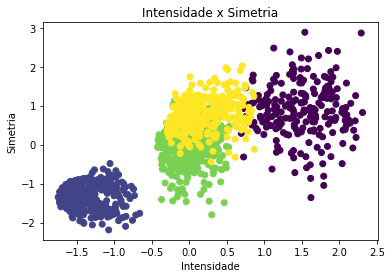

(None, None)

In [67]:
IntensidadeXSimetria(treinozt), IntensidadeXSimetria(testezt)

##### Linear Regression Classifier

�


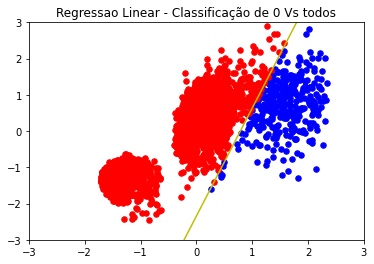

In [68]:
rX = [[1,x[0], x[1]] for x in  xtreinozt]

N = len(rX)

cztlr = LRClassifier()
cztlr.execute(rX, ytreinozt)


#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cztlr.getRegressionY(xOri[0]), cztlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 0 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cztlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30) 
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)

# Eixo X = Intensidade Eixo Y = Simetria
plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.show()

In [69]:
modelo_metricas(ytreinozt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1752        9
y +1       98      327

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.95      0.99      0.97      1761
   dígito +1       0.97      0.77      0.86       425

    accuracy                           0.95      2186
   macro avg       0.96      0.88      0.91      2186
weighted avg       0.95      0.95      0.95      2186

----------------------------------------------------------



�


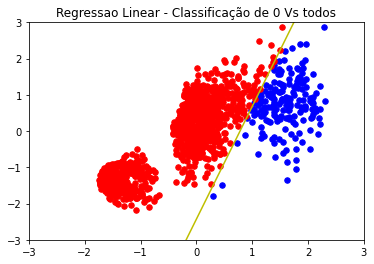

In [70]:

rX = [[1,x[0], x[1]] for x in  xtestezt]


N = len(rX)


cztlr.execute(rX, ytestezt)



#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cztlr.getRegressionY(xOri[0]), cztlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 0 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cztlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()




In [71]:
modelo_metricas(ytestezt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      894        3
y +1       43      175

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.95      1.00      0.97       897
   dígito +1       0.98      0.80      0.88       218

    accuracy                           0.96      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.96      0.96      0.96      1115

----------------------------------------------------------



In [72]:
best_classifiers_zt.append(getPrecisao(ytestezt, pred))

##### Pocket PLA

Número de iterações:  99


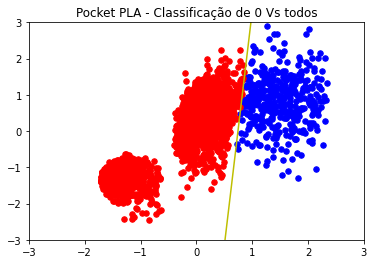

In [73]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtreinozt]


cztpp = PocketPLA()
cztpp.execute(rX, ytreinozt)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cztpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cztpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 0 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [74]:
modelo_metricas(ytreinozt, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1756        5
y +1       10      415

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      1.00      1761
   dígito +1       0.99      0.98      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.99      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------



Número de iterações:  99


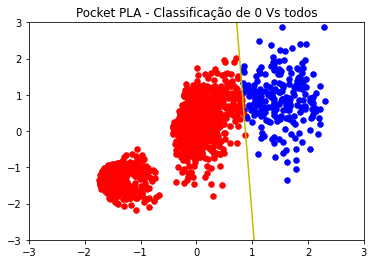

In [75]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtestezt]



cztpp.execute(rX, ytestezt)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cztpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cztpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 0 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [76]:
modelo_metricas(ytestezt, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      895        2
y +1        8      210

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      0.99       897
   dígito +1       0.99      0.96      0.98       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------



In [77]:
best_classifiers_zt.append(getPrecisao(ytestezt, predict))

##### Logistic Regression Classifier

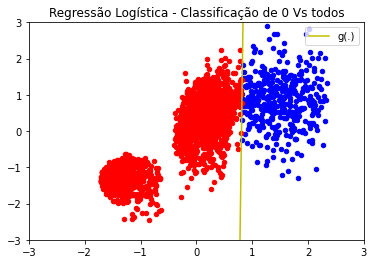

In [78]:
rx = [[1, x[0], x[1]] for x in xtreinozt]

# Executar o ajuste dos dados com Regressão Logística
cztlog = LogisticRegression_1()

cztlog.fit(rx, ytreinozt)

# Plota as porcentagens da Regressão Logística
pred = cztlog.predict(rx,cztlog.w)


xRL = [-3, +3]


yRL = [cztlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 0 Vs todos")
plt.show()

In [79]:
modelo_metricas(ytreinozt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1754        7
y +1       13      412

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      0.99      1761
   dígito +1       0.98      0.97      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.98      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------



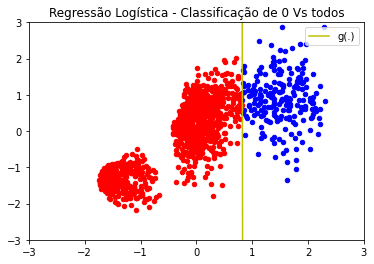

In [80]:
rx = [[1, x[0], x[1]] for x in xtestezt]



cztlog.fit(rx, ytestezt)

# Plota as porcentagens da Regressão Logística
pred = cztlog.predict(rx,cztlog.w)


xRL = [-3, +3]


yRL = [cztlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 0 Vs todos")
plt.show()

In [81]:
modelo_metricas(ytestezt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      893        4
y +1        7      211

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      0.99       897
   dígito +1       0.98      0.97      0.97       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------



In [82]:
best_classifiers_zt.append(getPrecisao(ytestezt, pred))

##### Weight decay

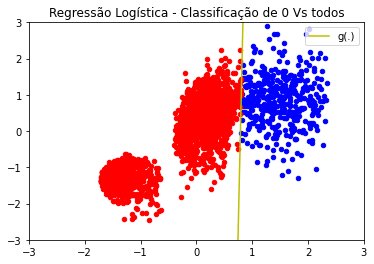

In [83]:
rx = [[1, x[0], x[1]] for x in xtreinozt]

cztwd = WeightDecay()

cztwd.fit(rx, ytreinozt)

pred = cztwd.predict(rx, cztwd.w)


xRL = [-3, +3]
yRL = [cztwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)



plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.title("Regressão Logística - Classificação de 0 Vs todos")
plt.show()


In [84]:
modelo_metricas(ytreinozt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1753        8
y +1       11      414

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      0.99      1761
   dígito +1       0.98      0.97      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.98      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------



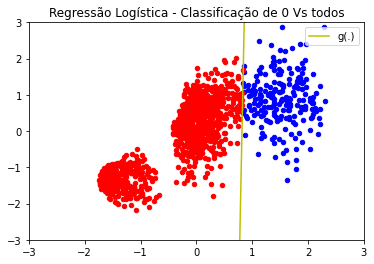

In [85]:
rx = [[1, x[0], x[1]] for x in xtestezt]



cztwd.fit(rx, ytestezt)

pred = cztwd.predict(rx, cztwd.w)


xRL = [-3, +3]
yRL = [cztwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)




plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.title("Regressão Logística - Classificação de 0 Vs todos")
plt.show()


In [86]:
modelo_metricas(ytestezt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      894        3
y +1        9      209

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.99      1.00      0.99       897
   dígito +1       0.99      0.96      0.97       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------



In [87]:
best_classifiers_zt.append(getPrecisao(ytestezt, pred))

## 1 Vs Resto

In [88]:
treinut = TreinoRedimensionado.copy()
testeut = TesteRedimensionado.copy()

# retirar os 0

treinut = treinut[treinut[:,0] != 0] 
testeut = testeut[testeut[:,0] != 0]


xtreinut = treinut[:,1:]
xtesteut = testeut[:,1:]

ytreinut = treinut[:,0]
ytesteut = testeut[:,0]

# atribuir 1 para 1 e -1 para o resto

ytreinut = np.where(ytreinut == 1, 1, -1)
ytesteut = np.where(ytesteut == 1, 1, -1)



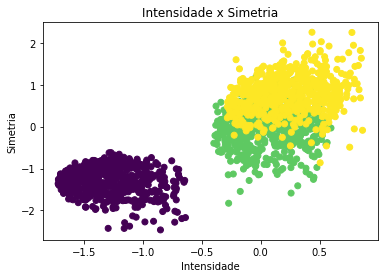

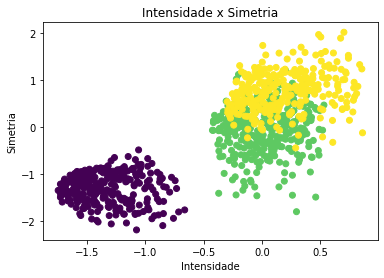

(None, None)

In [89]:
IntensidadeXSimetria(treinut), IntensidadeXSimetria(testeut)

#### Linear Regression Classifier

�


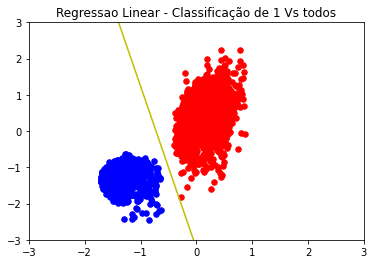

In [90]:
rX = [[1,x[0], x[1]] for x in  xtreinut]

N = len(rX)

cutlr = LRClassifier()
cutlr.execute(rX, ytreinut)


#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cutlr.getRegressionY(xOri[0]), cutlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 1 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cutlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30) 
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)

# Eixo X = Intensidade Eixo Y = Simetria
plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.show()

In [91]:
modelo_metricas(ytreinut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1153        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00      1153
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------



�


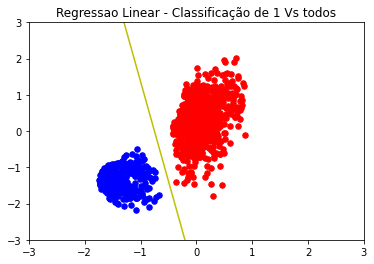

In [92]:

rX = [[1,x[0], x[1]] for x in  xtesteut]


N = len(rX)


cutlr.execute(rX, ytesteut)



#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cutlr.getRegressionY(xOri[0]), cutlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 1 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cutlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()



In [93]:
modelo_metricas(ytesteut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      605        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       605
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------



In [94]:
best_classifiers_ut.append(getPrecisao(ytesteut, pred))

#### Pocket PLA

Número de iterações:  5


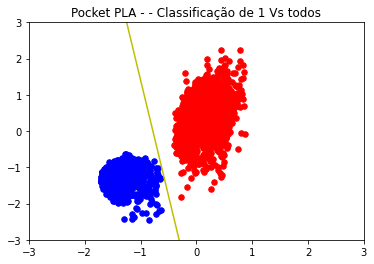

In [95]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtreinut]


cutpp = PocketPLA()
cutpp.execute(rX, ytreinut)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cutpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cutpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [96]:
modelo_metricas(ytreinut, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1153        0
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00      1153
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------



Número de iterações:  1


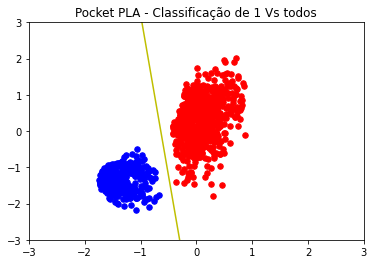

In [97]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtesteut]



cutpp.execute(rX, ytesteut)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cutpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cutpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [98]:
modelo_metricas(ytesteut, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      605        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       605
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------



In [99]:
best_classifiers_ut.append(getPrecisao(ytesteut, predict))

#### Logistic regression Classifier

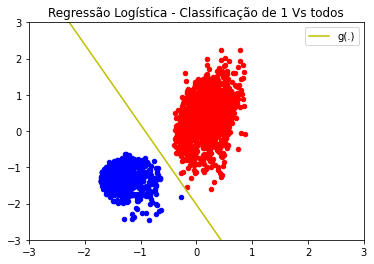

In [100]:
rx = [[1, x[0], x[1]] for x in xtreinut]

# Executar o ajuste dos dados com Regressão Logística
cutlog = LogisticRegression_1()

cutlog.fit(rx, ytreinut)

# Plota as porcentagens da Regressão Logística
pred = cutlog.predict(rx,cutlog.w)


xRL = [-3, +3]


yRL = [cutlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

plt.title("Regressão Logística - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [101]:
modelo_metricas(ytreinut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1152        1
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00      1153
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------



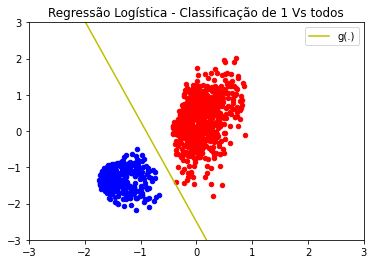

In [102]:
rx = [[1, x[0], x[1]] for x in xtesteut]



cutlog.fit(rx, ytesteut)

# Plota as porcentagens da Regressão Logística
pred = cutlog.predict(rx,cutlog.w)


xRL = [-3, +3]


yRL = [cutlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)

plt.title("Regressão Logística - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [103]:
modelo_metricas(ytesteut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      605        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       605
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------



In [104]:
best_classifiers_ut.append(getPrecisao(ytesteut, pred))

#### Weight Decay

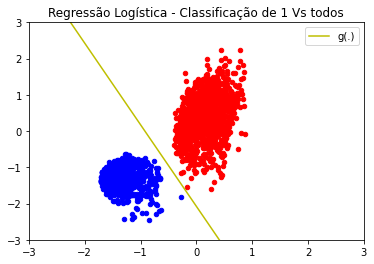

In [105]:
rx = [[1, x[0], x[1]] for x in xtreinut]
cutwd = WeightDecay()

cutwd.fit(rx, ytreinut)

pred = cutwd.predict(rx, cutwd.w)


xRL = [-3, +3]
yRL = [cutwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)






plt.title("Regressão Logística - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()


In [106]:
modelo_metricas(ytreinut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1     1152        1
y +1        0      608

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00      1153
   dígito +1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------



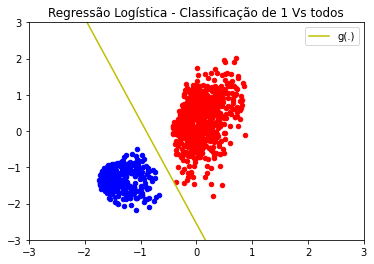

In [107]:
rx = [[1, x[0], x[1]] for x in xtesteut]



cutwd.fit(rx, ytesteut)

pred = cutwd.predict(rx, cutwd.w)


xRL = [-3, +3]
yRL = [cutwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)






plt.title("Regressão Logística - Classificação de 1 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()


In [108]:
modelo_metricas(ytesteut, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      605        0
y +1        0      292

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       1.00      1.00      1.00       605
   dígito +1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------



In [109]:
best_classifiers_ut.append(getPrecisao(ytesteut, pred))

## 4 Vs Resto

In [110]:
treinqt = TreinoRedimensionado.copy()
testeqt = TesteRedimensionado.copy()

# retirar os 0

treinqt = treinqt[treinqt[:,0] != 0] 
testeqt = testeqt[testeqt[:,0] != 0]

# retirar os 1

treinqt = treinqt[treinqt[:,0] != 1]
testeqt = testeqt[testeqt[:,0] != 1]

# Separar em treino e teste, features e labels

xtreinqt = treinqt[:,1:]
xtesteqt = testeqt[:,1:]

ytreinqt = treinqt[:,0]
ytesteqt = testeqt[:,0]


# atribuir 1 para 4 e -1 para o resto

ytreinqt = np.where(ytreinqt == 4, 1, -1)
ytesteqt = np.where(ytesteqt == 4, 1, -1)






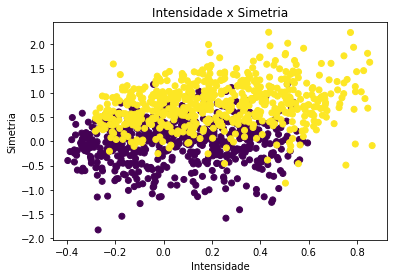

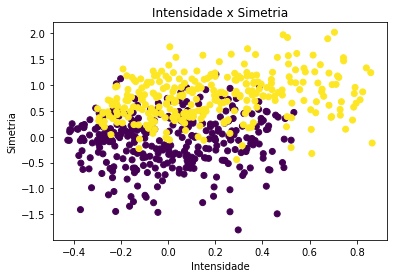

(None, None)

In [111]:
IntensidadeXSimetria(treinqt), IntensidadeXSimetria(testeqt)

#### Linear Regression Classifier

�


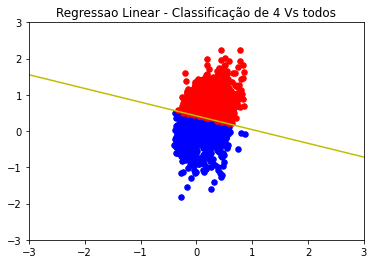

In [112]:
rX = [[1,x[0], x[1]] for x in  xtreinqt]

N = len(rX)

cqtlr = LRClassifier()
cqtlr.execute(rX, ytreinqt)


#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cqtlr.getRegressionY(xOri[0]), cqtlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 4 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cqtlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30) 
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)

# Eixo X = Intensidade Eixo Y = Simetria


plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [113]:
modelo_metricas(ytreinqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      468      108
y +1      105      472

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.82      0.81      0.81       576
   dígito +1       0.81      0.82      0.82       577

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------



�


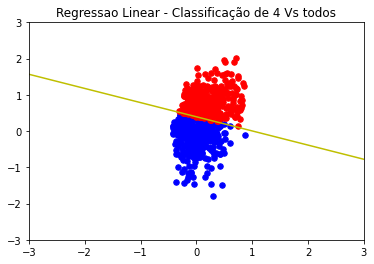

In [114]:

rX = [[1,x[0], x[1]] for x in  xtesteqt]


N = len(rX)


cutlr.execute(rX, ytesteqt)



#desenha a reta inferida pela regressao linear
xOri = [-3, +3]
yOri = [cutlr.getRegressionY(xOri[0]), cutlr.getRegressionY(xOri[1])]
plt.plot(xOri, yOri, '-y', label='RL')
plt.title("Regressao Linear - Classificação de 4 Vs todos")

#plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

pred = [cutlr.predict(x) for x in rX]

xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)

# plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
# plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()



In [115]:
modelo_metricas(ytesteqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      237       54
y +1       56      258

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.81      0.81      0.81       291
   dígito +1       0.83      0.82      0.82       314

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------



In [116]:
len(ytesteqt), len(pred)

(605, 605)

In [117]:
best_classifiers_qt.append(getPrecisao(ytesteqt, pred))

#### Pocket PLA

Número de iterações:  99


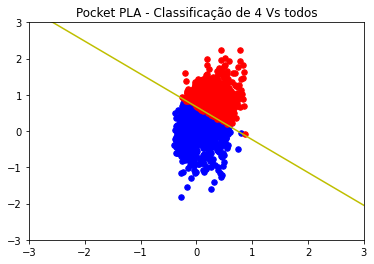

In [118]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtreinqt]


cqtpp = PocketPLA()
cqtpp.execute(rX, ytreinqt)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cqtpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cqtpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 4 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [119]:
modelo_metricas(ytreinqt, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      403      173
y +1       54      523

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.88      0.70      0.78       576
   dígito +1       0.75      0.91      0.82       577

    accuracy                           0.80      1153
   macro avg       0.82      0.80      0.80      1153
weighted avg       0.82      0.80      0.80      1153

----------------------------------------------------------



Número de iterações:  99


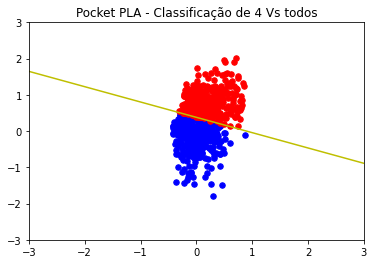

In [120]:
# executa o PLA sobre os dados de entrada X e y
rX = [[1, x[0], x[1]] for x in xtesteqt]



cqtpp.execute(rX, ytesteqt)

# desenha a reta inferida pelo PLA
xOri = [-3, +3]
yOri = [cqtpp.getOriginalY(x) for x in xOri]

plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


predict = [cqtpp.predict(x) for x in rX]

xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

plt.scatter(xP, yP, color='blue', marker='o', s=30)
plt.scatter(xN, yN, color='red', marker='o', s=30)
plt.title("Pocket PLA - Classificação de 4 Vs todos")
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

In [121]:
modelo_metricas(ytesteqt, predict)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      241       50
y +1       58      256

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.81      0.83      0.82       291
   dígito +1       0.84      0.82      0.83       314

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------



In [122]:
best_classifiers_qt.append(getPrecisao(ytesteqt, predict))

#### Logistic Regression Classifier

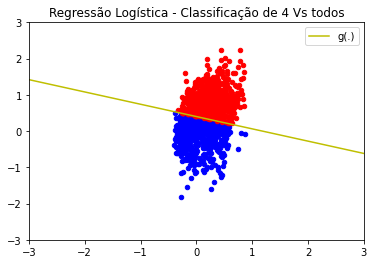

In [123]:
rx = [[1, x[0], x[1]] for x in xtreinqt]

# Executar o ajuste dos dados com Regressão Logística
cqtlog = LogisticRegression_1()

cqtlog.fit(rx, ytreinqt)

# Plota as porcentagens da Regressão Logística
pred = cqtlog.predict(rx,cqtlog.w)


xRL = [-3, +3]


yRL = [cqtlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 4 Vs todos")
plt.show()

In [124]:
modelo_metricas(ytreinqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      478       98
y +1      108      469

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.82      0.83      0.82       576
   dígito +1       0.83      0.81      0.82       577

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------



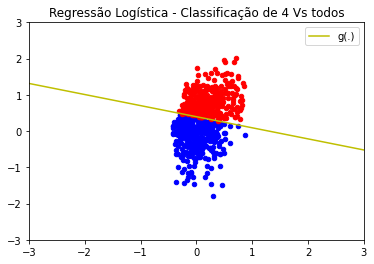

In [125]:
rx = [[1, x[0], x[1]] for x in xtesteqt]



cqtlog.fit(rx, ytesteqt)

# Plota as porcentagens da Regressão Logística
pred = cqtlog.predict(rx,cqtlog.w)


xRL = [-3, +3]


yRL = [cqtlog.getRegressionY(x) for x in xRL]
plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')

# Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.title("Regressão Logística - Classificação de 4 Vs todos")
plt.show()

In [126]:
modelo_metricas(ytesteqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      234       57
y +1       53      261

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.82      0.80      0.81       291
   dígito +1       0.82      0.83      0.83       314

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------



In [127]:
best_classifiers_qt.append(getPrecisao(ytesteqt, pred))

#### Weight Decay

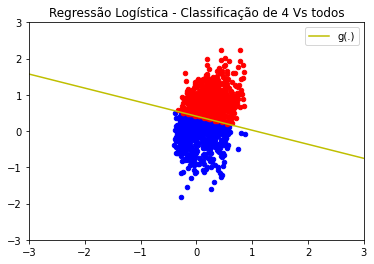

In [128]:
rx = [[1, x[0], x[1]] for x in xtreinqt]

cqtwd = WeightDecay()

cqtwd.fit(rx, ytreinqt)

pred = cqtwd.predict(rx, cqtwd.w)


xRL = [-3, +3]
yRL = [cqtwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)



plt.ylim(-3, 3)
plt.xlim(-3, 3)

plt.title("Regressão Logística - Classificação de 4 Vs todos")
plt.show()


In [129]:
modelo_metricas(ytreinqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      473      103
y +1      108      469

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.81      0.82      0.82       576
   dígito +1       0.82      0.81      0.82       577

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------



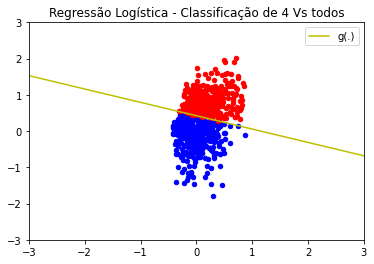

In [130]:
rx = [[1, x[0], x[1]] for x in xtesteqt]



cqtwd.fit(rx, ytesteqt)

pred = cqtwd.predict(rx, cqtwd.w)


xRL = [-3, +3]
yRL = [cqtwd.getRegressionY(x) for x in xRL]

plt.plot(xRL, yRL, 'y-', label='g(.)')
plt.legend(loc='upper right')


xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


plt.scatter(xP, yP, color='blue', marker='o', s=20)
plt.scatter(xN, yN, color='red', marker='o', s=20)



plt.ylim(-3, 3)
plt.xlim(-3, 3)


plt.title("Regressão Logística - Classificação de 4 Vs todos")
plt.show()


In [131]:
modelo_metricas(ytesteqt, pred)

------------------ Matriz de confusão ------------------

      pred -1  pred +1
y -1      226       65
y +1       47      267

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

   dígito -1       0.83      0.78      0.80       291
   dígito +1       0.80      0.85      0.83       314

    accuracy                           0.81       605
   macro avg       0.82      0.81      0.81       605
weighted avg       0.82      0.81      0.81       605

----------------------------------------------------------



In [132]:
best_classifiers_qt.append(getPrecisao(ytesteqt, pred))

## Função Para Classificador de dígitos completo


Ao final serão construídas três funções hipótese que juntas irão realizar a classificação
multiclasse dos quatro dígitos. Seja 𝑥 a imagem teste a ser classificada, classifique 𝑥 com o
seguinte algoritmo: 
para os dígitos 𝑖 ∈ [0,1,4] 
se 𝑓𝑖
(𝑥) = +1
classifique como dígito i
senão
se i == 4
classifique como dígito 5
3.4. Comparação entre os classificadores

In [133]:
len(best_classifiers_zt), len(best_classifiers_ut), len(best_classifiers_qt), len(best_classifiers_ct)

(4, 4, 4, 0)

In [134]:
classifiers_ = ["LinearRegression","Pocket_PLA","LogisticRegression_1", "WeightDecay"]

# Melhores classificadores para cada classe

classifiers_zt = [cztlr,cztpp,cztlog,cztwd]
classifiers_ut = [cutlr,cutpp,cutlog,cutwd]
classifiers_qt = [cqtlr,cqtpp,cqtlog,cqtwd]
# classifiers_ct = [cctlr,cctpp,cctlog,cctwd]

In [135]:
# Retorne o index do melhor classificador de cada tipo

print("Melhor classificador de Z: ", classifiers_[best_classifiers_zt.index(max(best_classifiers_zt))])
print("Melhor classificador de U: ", classifiers_[best_classifiers_ut.index(max(best_classifiers_ut))])
print("Melhor classificador de Q: ", classifiers_[best_classifiers_qt.index(max(best_classifiers_qt))])
# print("Melhor classificador de C: ", classifiers_[best_classifiers_ct.index(max(best_classifiers_ct))])

Melhor classificador de Z:  Pocket_PLA
Melhor classificador de U:  LinearRegression
Melhor classificador de Q:  WeightDecay


In [136]:
# Retorne o melhor classificador de cada tipo

BestClassifiers = [classifiers_zt[best_classifiers_zt.index(max(best_classifiers_zt))], classifiers_ut[best_classifiers_ut.index(max(best_classifiers_ut))], classifiers_qt[best_classifiers_qt.index(max(best_classifiers_qt))] ]

In [137]:
def Classify(x, BestClassifiers):
   
    # para os dígitos 𝑖 ∈ [0,1,4] 
    # se 𝑓𝑖(𝑥) = +1
    # classifique como dígito i
    # senão
    # se i == 4
    # classifique como dígito 5
    
    # x é um vetor de duas dimensões, que representa os atributos intensidade e simetria
    
    
    
    
    for i in range(len(BestClassifiers)):
      
        
       
    
        
        if BestClassifiers[i].predict(x, BestClassifiers[i].w) == 1:
            #print("Classificado como ", i)
            return i
            
        elif i == 2:
           # print("Classificado como 5")
            return 5

In [138]:
contaErro = 0

for i in range(len(TesteRedimensionado)):
    # print(Classify([1, TesteRedimensionado[i][1], TesteRedimensionado[i][2]], BestClassifiers), TesteRedimensionado[i][0])
    
    if Classify([1, TesteRedimensionado[i][1], TesteRedimensionado[i][2]], BestClassifiers) != TesteRedimensionado[i][0]:
        contaErro += 1
        
print("Acurácia: ", 1 - contaErro/len(TesteRedimensionado))

Acurácia:  0.6511210762331838


## Classificador Multiclasse

In [139]:
clt0 = []
clt1 = []
clt4 = []
clt5 = []

bestclt = []

### Teste Generico

In [140]:

def separaGenerico(TreinoRedimensionado,TesteRedimensionado,digito):
 
    
    # teste15 = TesteRedimensionado[np.where((TesteRedimensionado[:,0] == 1) | (TesteRedimensionado[:,0] == 5))]
    TreinoRedimensionado = np.array(TreinoRedimensionado)
    TesteRedimensionado = np.array(TesteRedimensionado)
    
    treinozt = TreinoRedimensionado.copy()
    testezt = TesteRedimensionado.copy()
    


    xtreinozt = treinozt[:,1:]
    xtestezt = testezt[:,1:]

    ytreinozt = treinozt[:,0]
    ytestezt = testezt[:,0]


    # Atriuir 1 para 0 e -1 para o resto

    ytreinozt = np.where(ytreinozt == digito, 1, -1)
    ytestezt = np.where(ytestezt == digito, 1, -1)
    
    return xtreinozt, xtestezt, ytreinozt, ytestezt


    

In [141]:
def RegressaoLinearGenerica(xtreinozt, xtestezt, ytreinozt, ytestezt, digito,i):
    
   

    rX = [[1,x[0], x[1]] for x in  xtreinozt]

    N = len(rX)

    czlr = LRClassifier()
    czlr.execute(rX, ytreinozt)


    #desenha a reta inferida pela regressao linear
    xOri = [-3,3]
    yOri = [czlr.getRegressionY(xOri[0]), czlr.getRegressionY(xOri[1])]
    plt.plot(xOri, yOri, '-y', label='RL')
    plt.title(f"Classificação modelo Linear do dígito {digito}")

    #plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

    pred = [czlr.predict(x) for x in rX]

    xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
    yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
    xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
    yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

    plt.scatter(xP, yP, color='blue', marker='o', s=30) 
    plt.scatter(xN, yN, color='red', marker='o', s=30)
    predztreinolr = pred 

    plt.ylim(-3, 3)
    plt.xlim(-3, 3)

    plt.show()
    
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytreinozt[i]])/len(pred))
    print("modelo treino métricas")
    print(modelo_metricas(ytreinozt, pred,digito,i))
        
    rX = [[1,x[0], x[1]] for x in  xtestezt]
    N = len(rX)
    czlr.execute(rX, ytestezt)
    #desenha a reta inferida pela regressao linear
    xOri = [-3,3]
    yOri = [czlr.getRegressionY(xOri[0]), czlr.getRegressionY(xOri[1])]
    plt.plot(xOri, yOri, '-y', label='RL')
    plt.title(f"Classificação modelo linear do dígito {digito}")

    #plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)

    pred = [czlr.predict(x) for x in rX]

    xP = [rX[i][1] for i in range(N) if(pred[i] > 0)] # Vetor de x's dos pontos classificados como +1
    yP = [rX[i][2] for i in range(N) if(pred[i] > 0)] # Vetor de y's dos pontos classificados como +1
    xN = [rX[i][1] for i in range(N) if(pred[i] < 0)] # Vetor de x's dos pontos classificados como -1
    yN = [rX[i][2] for i in range(N) if(pred[i] < 0)] # Vetor de y's dos pontos classificados como -1

    plt.scatter(xP, yP, color='blue', marker='o', s=30)
    plt.scatter(xN, yN, color='red', marker='o', s=30)

    # plt.scatter([rX[i][1] for i in range(N) if(pred[i] > 0)], [rX[i][2] for i in range(N) if(pred[i] > 0)], color='blue', marker='o', s=30)
    # plt.scatter([rX[i][1] for i in range(N) if(pred[i] < 0)], [rX[i][2] for i in range(N) if(pred[i] < 0)], color='red', marker='o', s=30)

    predztestelr = pred
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()
    
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytestezt[i]])/len(pred))
    print("modelo teste métricas")
    print(modelo_metricas(ytestezt, pred,digito,i))
    
    

    
    return czlr,getPrecisao(ytestezt,pred)




In [142]:
def PocketPlaGenerico(xtreinozt, xtestezt, ytreinozt, ytestezt,digito,i):
    
    # executa o PLA sobre os dados de entrada X e y
    rX = [[1, x[0], x[1]] for x in xtreinozt]


    czpp = PocketPLA()
    czpp.execute(rX, ytreinozt)

    # desenha a reta inferida pelo PLA
    xOri = [-3,3]
    yOri = [czpp.getOriginalY(x) for x in xOri]

    plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


    predict = [czpp.predict(x) for x in rX]

    xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
    yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

    xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
    yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

    plt.scatter(xP, yP, color='blue', marker='o', s=30)
    plt.scatter(xN, yN, color='red', marker='o', s=30)
    plt.title(f"Classificação perceptron do dígito {digito}")


    predztreinoppla = predict

    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytreinozt[i]])/len(pred))
    print("modelo treino métricas")
    print(len(ytreinozt),len(predict))
    print(modelo_metricas(ytreinozt, predict,digito,i))
    
        # executa o PLA sobre os dados de entrada X e y
    rX = [[1, x[0], x[1]] for x in xtestezt]



    czpp.execute(rX, ytestezt)

    # desenha a reta inferida pelo PLA
    xOri = [-3,3]
    yOri = [czpp.getOriginalY(x) for x in xOri]

    plt.plot(xOri, yOri, '-y', label='g(.)')  # reta inferida pelo PLA


    predict = [czpp.predict(x) for x in rX]

    xP = [rX[i][1] for i in range(len(rX)) if predict[i] > 0]
    yP = [rX[i][2] for i in range(len(rX)) if predict[i] > 0]

    xN = [rX[i][1] for i in range(len(rX)) if predict[i] < 0]
    yN = [rX[i][2] for i in range(len(rX)) if predict[i] < 0]

    plt.scatter(xP, yP, color='blue', marker='o', s=30)
    plt.scatter(xN, yN, color='red', marker='o', s=30)
    plt.title(f"Classificação perceptron do dígito {digito}")

    predztesteppla = predict
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)

    plt.show()
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytestezt[i]])/len(pred))
    print("modelo teste métricas")
    print(modelo_metricas(ytestezt, predict,digito,i))
    
    
    return czpp,getPrecisao(ytestezt,predict)
    

In [143]:
def RegressaoLogisticaGenerico(xtreinozt, xtestezt, ytreinozt, ytestezt, digito,i):
    
    
    rx = [[1, x[0], x[1]] for x in xtreinozt]

    # Executar o ajuste dos dados com Regressão Logística
    czlog = LogisticRegression_1()

    czlog.fit(rx, ytreinozt)

    # Plota as porcentagens da Regressão Logística
    pred = czlog.predict(rx,czlog.w)


    xRL = [-3,3]


    yRL = [czlog.getRegressionY(x) for x in xRL]
    plt.plot(xRL, yRL, 'y-', label='g(.)')
    plt.legend(loc='upper right')

    # Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
    xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
    yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
    xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
    yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

    plt.scatter(xP, yP, color='blue', marker='o', s=20)
    plt.scatter(xN, yN, color='red', marker='o', s=20)

    plt.title("Classificação Regressão Logística do dígito " + str(digito))

    predztreinolog = pred
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytreinozt[i]])/len(pred))
    print("modelo treino métricas")
    print(modelo_metricas(ytreinozt, pred,digito,i))
    
    
    rx = [[1, x[0], x[1]] for x in xtestezt]



    czlog.fit(rx, ytestezt)

    # Plota as porcentagens da Regressão Logística
    pred = czlog.predict(rx,czlog.w)


    xRL = [-3,3]


    yRL = [czlog.getRegressionY(x) for x in xRL]
    plt.plot(xRL, yRL, 'y-', label='g(.)')
    plt.legend(loc='upper right')

    # Plota os pontos classificados pela RL com bolinha azul(+) e vermelha(-)
    xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0.5]
    yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0.5]
    xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0.5]
    yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0.5]

    plt.scatter(xP, yP, color='blue', marker='o', s=20)
    plt.scatter(xN, yN, color='red', marker='o', s=20)

    plt.title("Classificação Regressão Logística do dígito " + str(digito))

    predztestelog = pred
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()
    
    print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytestezt[i]])/len(pred))
    print("modelo teste métricas")
    print(modelo_metricas(ytestezt, pred,digito,i))
    
    
    return czlog,getPrecisao(ytestezt,pred)
    

In [144]:
def WeightDecayGenerico(xtreinozt, xtestezt, ytreinozt, ytestezt, digito,i):
    
    rx = [[1, x[0], x[1]] for x in xtreinozt]

    czwd = WeightDecay()

    czwd.fit(rx, ytreinozt)

    pred = czwd.predict(rx, czwd.w)


    xRL = [-3,3]
    yRL = [czwd.getRegressionY(x) for x in xRL]

    plt.plot(xRL, yRL, 'y-', label='g(.)')
    plt.legend(loc='upper right')


    xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
    yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

    xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
    yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


    plt.scatter(xP, yP, color='blue', marker='o', s=20)
    plt.scatter(xN, yN, color='red', marker='o', s=20)


    predztreinowd = pred




    plt.title("Classificação Weight Decay do dígito " + str(digito))
    plt.show()
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytreinozt[i]])/len(pred))
    print("modelo treino métricas")
    print(modelo_metricas(ytreinozt, pred,digito,i))
    
    
    
    rx = [[1, x[0], x[1]] for x in xtestezt]



    czwd.fit(rx, ytestezt)

    pred = czwd.predict(rx, czwd.w)


    xRL = [-3, 3]
    yRL = [czwd.getRegressionY(x) for x in xRL]

    plt.plot(xRL, yRL, 'y-', label='g(.)')
    plt.legend(loc='upper right')


    xP = [rx[i][1] for i in range(len(rx)) if pred[i] >= 0]
    yP = [rx[i][2] for i in range(len(rx)) if pred[i] >= 0]

    xN = [rx[i][1] for i in range(len(rx)) if pred[i] < 0]
    yN = [rx[i][2] for i in range(len(rx)) if pred[i] < 0]


    plt.scatter(xP, yP, color='blue', marker='o', s=20)
    plt.scatter(xN, yN, color='red', marker='o', s=20)




    predztestewd = pred

    plt.title("Classificação Weight Decay do dígito " + str(digito))
    plt.ylim(-3, 3)
    plt.xlim(-3, 3)
    plt.show()
    # print("Acurácia: ", 1 - sum([1 for i in range(len(pred)) if pred[i] != ytestezt[i]])/len(pred))
    print("modelo teste métricas")
    print(modelo_metricas(ytestezt, pred,digito,i))
    
    
    return czwd,getPrecisao(ytestezt,pred)


In [145]:
def iteracao(x,i):
    
    return f"Numeral {x} - {i}"

In [146]:
def modelo_metricas(y, predicted_y, digito, i ,minus1="-1", plus1="+1"):
    
    print("it",iteracao(digito,i))
    
    from sklearn.metrics import classification_report
    
    # Convertendo para array numpy, se ainda não estiver
    y = np.array(y)
    predicted_y = np.array(predicted_y)
    
    print(y[:10], predicted_y[:10])
    print(len(y), len(predicted_y))
    
    # Calculando a matriz de confusão manualmente
    matriz_confusao = np.array([[np.sum((y == 1) & (predicted_y == 1)), np.sum((y == 1) & (predicted_y == -1))],
                                 [np.sum((y == -1) & (predicted_y == 1)), np.sum((y == -1) & (predicted_y == -1))]])
    
    print("------------------ Matriz de confusão ------------------\n")
    print(matriz_confusao)
    print("\n-------- Relatório de eficácia de classificação --------\n")
    
    # Ajustando a chamada de classification_report para classificação binária
    print(classification_report(y, predicted_y, zero_division=0))
    print("----------------------------------------------------------\n")
    

�


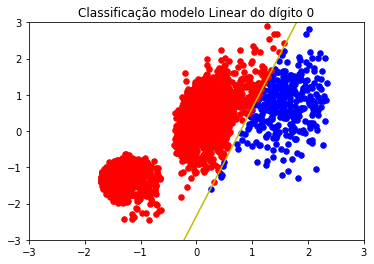

modelo treino métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [ 1 -1 -1  1  1  1 -1  1  1  1]
2186 2186
------------------ Matriz de confusão ------------------

[[ 327   98]
 [   9 1752]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      0.99      0.97      1761
           1       0.97      0.77      0.86       425

    accuracy                           0.95      2186
   macro avg       0.96      0.88      0.91      2186
weighted avg       0.95      0.95      0.95      2186

----------------------------------------------------------

None
�


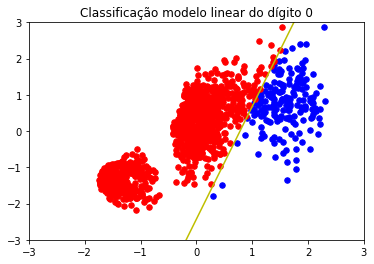

modelo teste métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [ 1  1  1  1  1 -1 -1  1  1  1]
1115 1115
------------------ Matriz de confusão ------------------

[[175  43]
 [  3 894]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       897
           1       0.98      0.80      0.88       218

    accuracy                           0.96      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.96      0.96      0.96      1115

----------------------------------------------------------

None


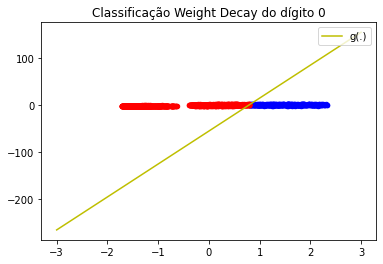

modelo treino métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 414   11]
 [   8 1753]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1761
           1       0.98      0.97      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.98      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------

None


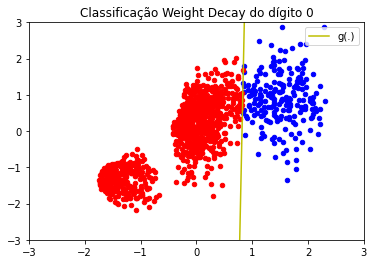

modelo teste métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
1115 1115
------------------ Matriz de confusão ------------------

[[209   9]
 [  3 894]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       897
           1       0.99      0.96      0.97       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------

None


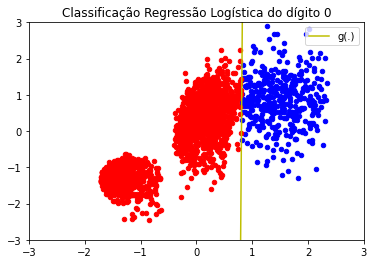

modelo treino métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 414   11]
 [   7 1754]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1761
           1       0.98      0.97      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.99      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------

None


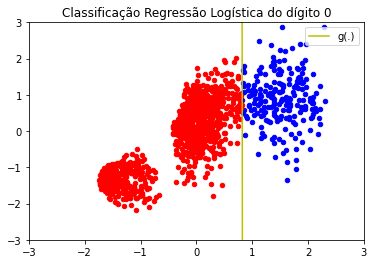

Acurácia:  0.9901345291479821
modelo teste métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
1115 1115
------------------ Matriz de confusão ------------------

[[211   7]
 [  4 893]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       897
           1       0.98      0.97      0.97       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------

None
Número de iterações:  99


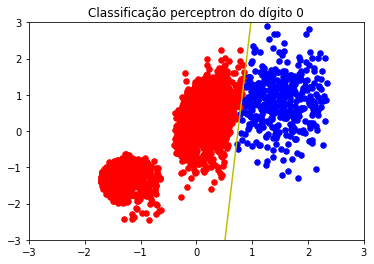

modelo treino métricas
2186 2186
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 415   10]
 [   5 1756]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      1761
           1       0.99      0.98      0.98       425

    accuracy                           0.99      2186
   macro avg       0.99      0.99      0.99      2186
weighted avg       0.99      0.99      0.99      2186

----------------------------------------------------------

None
Número de iterações:  99


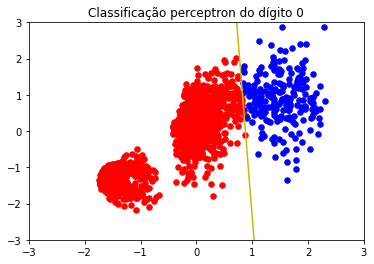

modelo teste métricas
it Numeral 0 - 0
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
1115 1115
------------------ Matriz de confusão ------------------

[[210   8]
 [  2 895]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       897
           1       0.99      0.96      0.98       218

    accuracy                           0.99      1115
   macro avg       0.99      0.98      0.99      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------

None
�


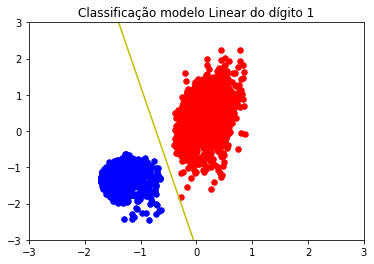

modelo treino métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1761 1761
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1153]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1153
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------

None
�


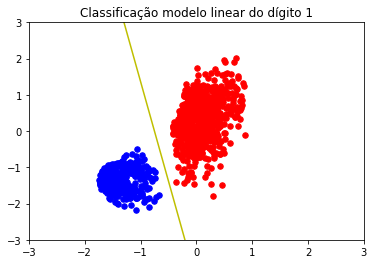

modelo teste métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
897 897
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 605]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------

None


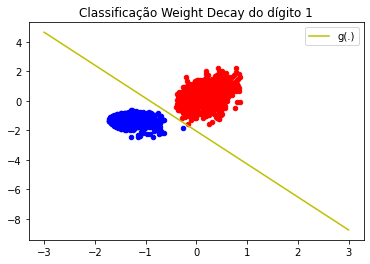

modelo treino métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1152]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1153
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------

None


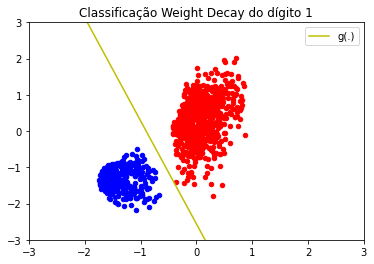

modelo teste métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
897 897
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 605]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------

None


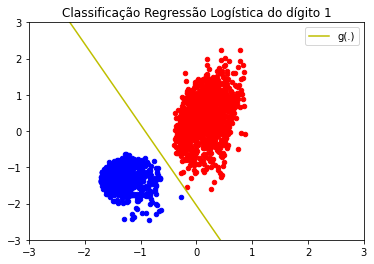

modelo treino métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1152]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1153
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------

None


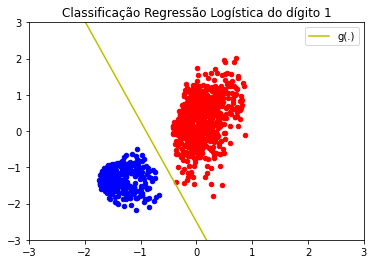

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
897 897
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 605]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------

None
Número de iterações:  5


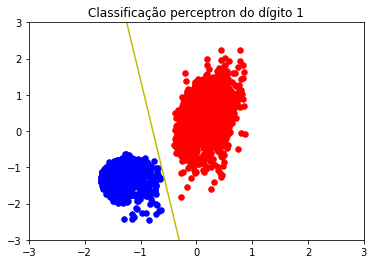

modelo treino métricas
1761 1761
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1153]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1153
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1761
   macro avg       1.00      1.00      1.00      1761
weighted avg       1.00      1.00      1.00      1761

----------------------------------------------------------

None
Número de iterações:  1


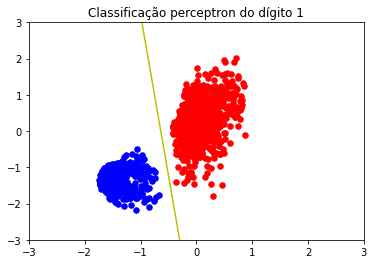

modelo teste métricas
it Numeral 1 - 0
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
897 897
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 605]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       605
           1       1.00      1.00      1.00       292

    accuracy                           1.00       897
   macro avg       1.00      1.00      1.00       897
weighted avg       1.00      1.00      1.00       897

----------------------------------------------------------

None
�


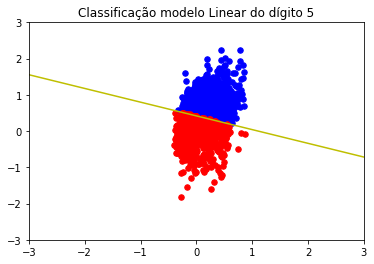

modelo treino métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1  1 -1 -1 -1 -1  1  1 -1 -1]
1153 1153
------------------ Matriz de confusão ------------------

[[468 108]
 [105 472]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.82      0.82       577
           1       0.82      0.81      0.81       576

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------

None
�


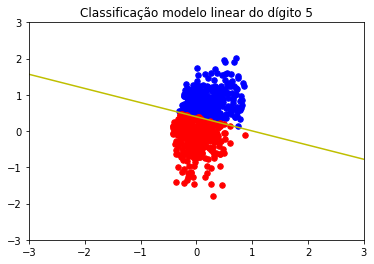

modelo teste métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]
605 605
------------------ Matriz de confusão ------------------

[[237  54]
 [ 56 258]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.83      0.82      0.82       314
           1       0.81      0.81      0.81       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None


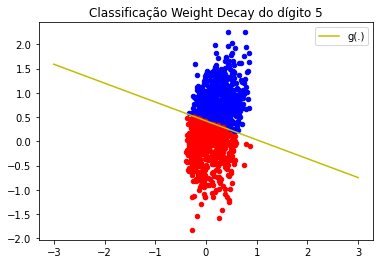

modelo treino métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1.  1.  1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[467 109]
 [105 472]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.82      0.82       577
           1       0.82      0.81      0.81       576

    accuracy                           0.81      1153
   macro avg       0.81      0.81      0.81      1153
weighted avg       0.81      0.81      0.81      1153

----------------------------------------------------------

None


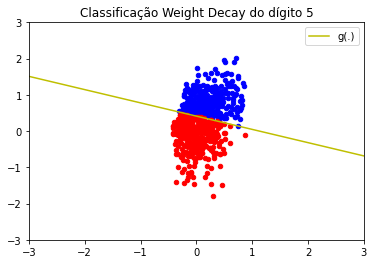

modelo teste métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[233  58]
 [ 53 261]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82       314
           1       0.81      0.80      0.81       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None


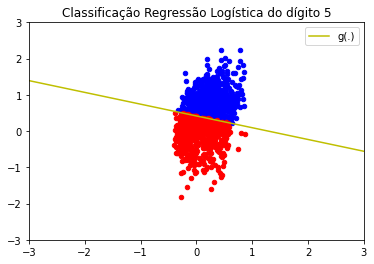

modelo treino métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1.  1.  1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[469 107]
 [102 475]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82       577
           1       0.82      0.81      0.82       576

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------

None


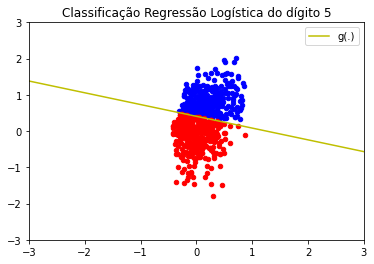

Acurácia:  0.8165289256198347
modelo teste métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[233  58]
 [ 53 261]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82       314
           1       0.81      0.80      0.81       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None
Número de iterações:  99


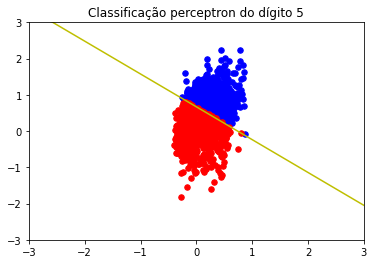

modelo treino métricas
1153 1153
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[403 173]
 [ 54 523]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.75      0.91      0.82       577
           1       0.88      0.70      0.78       576

    accuracy                           0.80      1153
   macro avg       0.82      0.80      0.80      1153
weighted avg       0.82      0.80      0.80      1153

----------------------------------------------------------

None
Número de iterações:  99


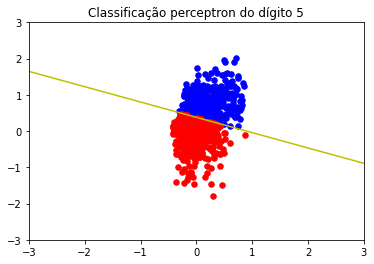

modelo teste métricas
it Numeral 5 - 0
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[241  50]
 [ 58 256]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83       314
           1       0.81      0.83      0.82       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None
�


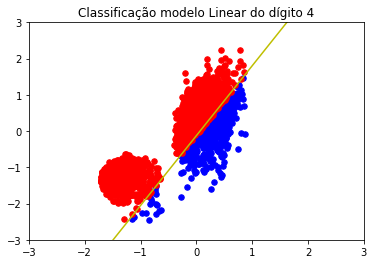

modelo treino métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1761 1761
------------------ Matriz de confusão ------------------

[[ 278  299]
 [ 153 1031]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.78      0.87      0.82      1184
           1       0.65      0.48      0.55       577

    accuracy                           0.74      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.73      0.74      0.73      1761

----------------------------------------------------------

None
�


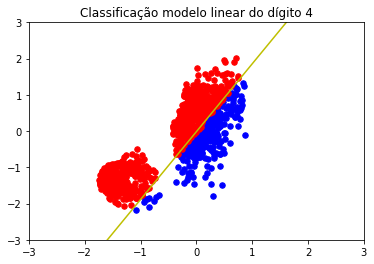

modelo teste métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
897 897
------------------ Matriz de confusão ------------------

[[175 139]
 [ 72 511]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.79      0.88      0.83       583
           1       0.71      0.56      0.62       314

    accuracy                           0.76       897
   macro avg       0.75      0.72      0.73       897
weighted avg       0.76      0.76      0.76       897

----------------------------------------------------------

None


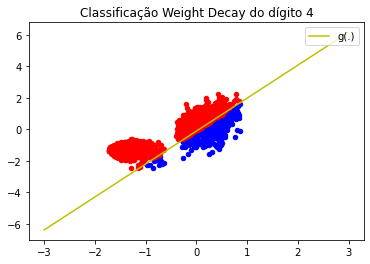

modelo treino métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 284  293]
 [ 166 1018]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.78      0.86      0.82      1184
           1       0.63      0.49      0.55       577

    accuracy                           0.74      1761
   macro avg       0.70      0.68      0.68      1761
weighted avg       0.73      0.74      0.73      1761

----------------------------------------------------------

None


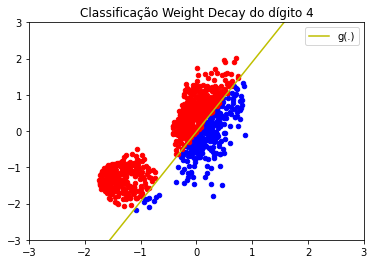

modelo teste métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[174 140]
 [ 75 508]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.78      0.87      0.83       583
           1       0.70      0.55      0.62       314

    accuracy                           0.76       897
   macro avg       0.74      0.71      0.72       897
weighted avg       0.75      0.76      0.75       897

----------------------------------------------------------

None


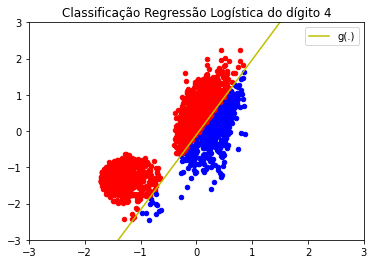

modelo treino métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 285  292]
 [ 168 1016]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.78      0.86      0.82      1184
           1       0.63      0.49      0.55       577

    accuracy                           0.74      1761
   macro avg       0.70      0.68      0.68      1761
weighted avg       0.73      0.74      0.73      1761

----------------------------------------------------------

None


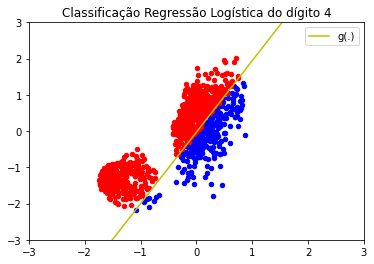

Acurácia:  0.7614269788182831
modelo teste métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[175 139]
 [ 75 508]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.79      0.87      0.83       583
           1       0.70      0.56      0.62       314

    accuracy                           0.76       897
   macro avg       0.74      0.71      0.72       897
weighted avg       0.76      0.76      0.75       897

----------------------------------------------------------

None
Número de iterações:  99


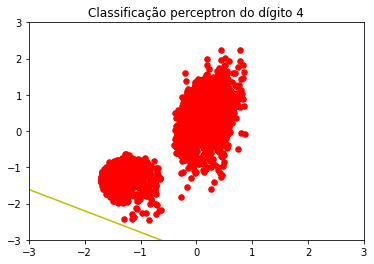

modelo treino métricas
1761 1761
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[   0  577]
 [   0 1184]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.67      1.00      0.80      1184
           1       0.00      0.00      0.00       577

    accuracy                           0.67      1761
   macro avg       0.34      0.50      0.40      1761
weighted avg       0.45      0.67      0.54      1761

----------------------------------------------------------

None
Número de iterações:  99


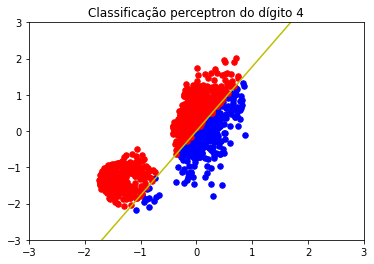

modelo teste métricas
it Numeral 4 - 1
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[181 133]
 [ 77 506]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.79      0.87      0.83       583
           1       0.70      0.58      0.63       314

    accuracy                           0.77       897
   macro avg       0.75      0.72      0.73       897
weighted avg       0.76      0.77      0.76       897

----------------------------------------------------------

None
�


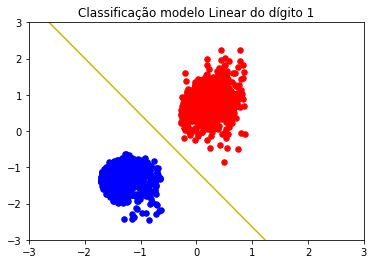

modelo treino métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1184 1184
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 576]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None
�


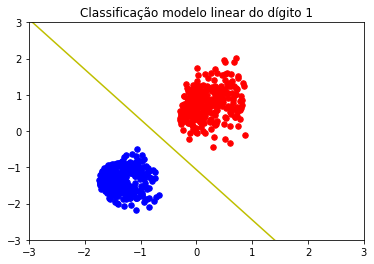

modelo teste métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
583 583
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 291]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None


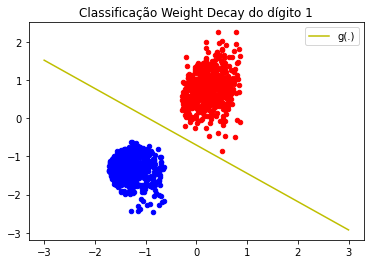

modelo treino métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1184 1184
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 576]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None


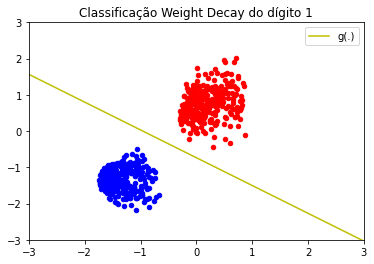

modelo teste métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
583 583
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 291]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None


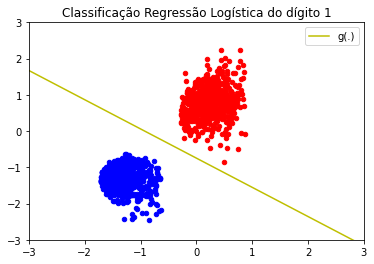

modelo treino métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1184 1184
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 576]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None


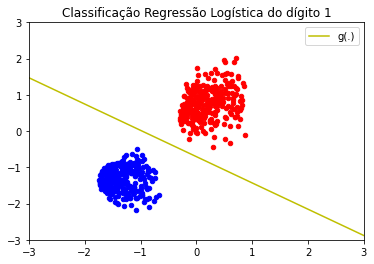

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
583 583
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 291]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None
Número de iterações:  1


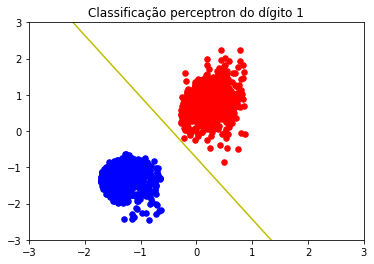

modelo treino métricas
1184 1184
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1184 1184
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 576]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       576
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None
Número de iterações:  1


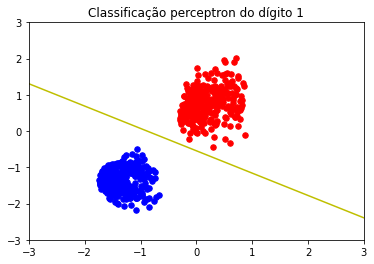

modelo teste métricas
it Numeral 1 - 1
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
583 583
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 291]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       291
           1       1.00      1.00      1.00       292

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None
�


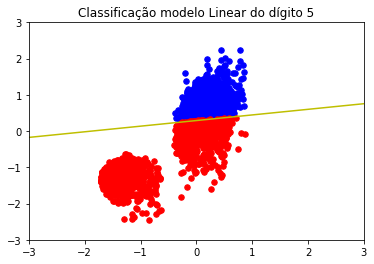

modelo treino métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1761 1761
------------------ Matriz de confusão ------------------

[[ 495   81]
 [ 140 1045]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.93      0.88      0.90      1185
           1       0.78      0.86      0.82       576

    accuracy                           0.87      1761
   macro avg       0.85      0.87      0.86      1761
weighted avg       0.88      0.87      0.88      1761

----------------------------------------------------------

None
�


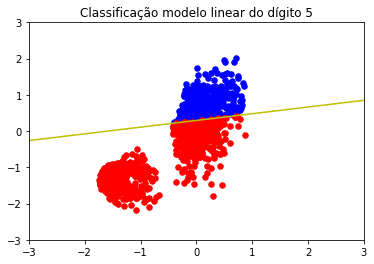

modelo teste métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
897 897
------------------ Matriz de confusão ------------------

[[249  42]
 [ 70 536]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.93      0.88      0.91       606
           1       0.78      0.86      0.82       291

    accuracy                           0.88       897
   macro avg       0.85      0.87      0.86       897
weighted avg       0.88      0.88      0.88       897

----------------------------------------------------------

None


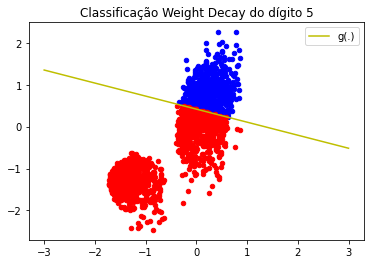

modelo treino métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 468  108]
 [ 101 1084]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1185
           1       0.82      0.81      0.82       576

    accuracy                           0.88      1761
   macro avg       0.87      0.86      0.86      1761
weighted avg       0.88      0.88      0.88      1761

----------------------------------------------------------

None


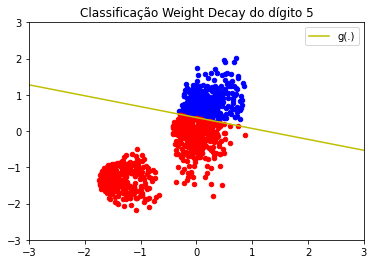

modelo teste métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[241  50]
 [ 58 548]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.92      0.90      0.91       606
           1       0.81      0.83      0.82       291

    accuracy                           0.88       897
   macro avg       0.86      0.87      0.86       897
weighted avg       0.88      0.88      0.88       897

----------------------------------------------------------

None


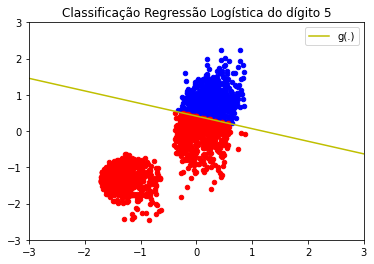

modelo treino métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 471  105]
 [ 105 1080]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91      1185
           1       0.82      0.82      0.82       576

    accuracy                           0.88      1761
   macro avg       0.86      0.86      0.86      1761
weighted avg       0.88      0.88      0.88      1761

----------------------------------------------------------

None


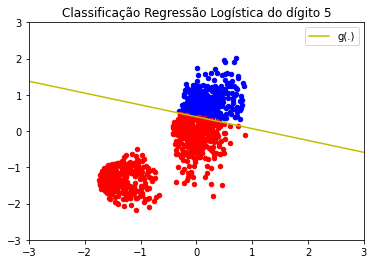

Acurácia:  0.875139353400223
modelo teste métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[234  57]
 [ 55 551]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       606
           1       0.81      0.80      0.81       291

    accuracy                           0.88       897
   macro avg       0.86      0.86      0.86       897
weighted avg       0.87      0.88      0.88       897

----------------------------------------------------------

None
Número de iterações:  99


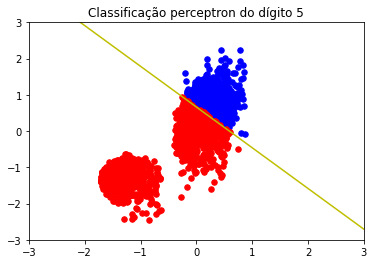

modelo treino métricas
1761 1761
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1761 1761
------------------ Matriz de confusão ------------------

[[ 407  169]
 [  74 1111]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.94      0.90      1185
           1       0.85      0.71      0.77       576

    accuracy                           0.86      1761
   macro avg       0.86      0.82      0.84      1761
weighted avg       0.86      0.86      0.86      1761

----------------------------------------------------------

None
Número de iterações:  99


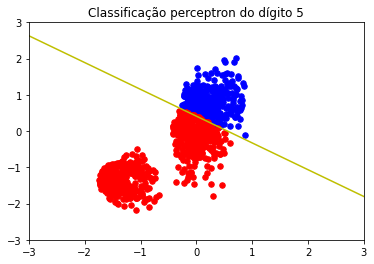

modelo teste métricas
it Numeral 5 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
897 897
------------------ Matriz de confusão ------------------

[[239  52]
 [ 55 551]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.91      0.91      0.91       606
           1       0.81      0.82      0.82       291

    accuracy                           0.88       897
   macro avg       0.86      0.87      0.86       897
weighted avg       0.88      0.88      0.88       897

----------------------------------------------------------

None
�


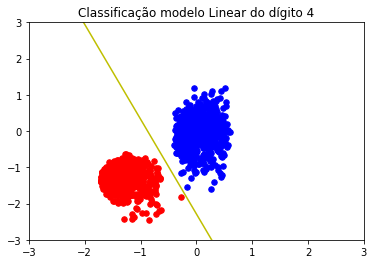

modelo treino métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None
�


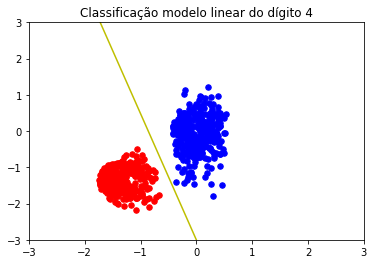

modelo teste métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None


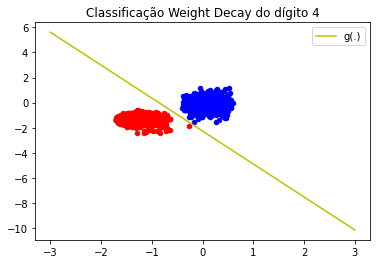

modelo treino métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None


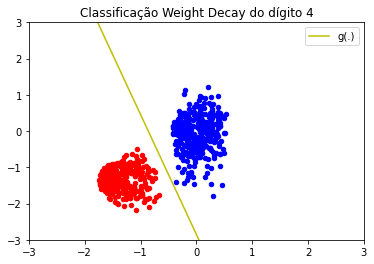

modelo teste métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None


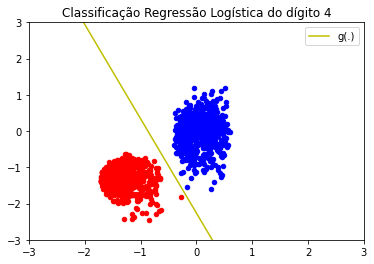

modelo treino métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None


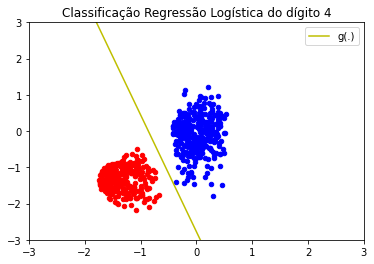

Acurácia:  1.0
modelo teste métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None
Número de iterações:  5


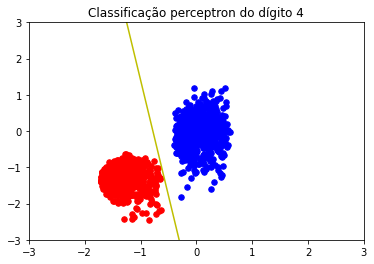

modelo treino métricas
1185 1185
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[577   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None
Número de iterações:  1


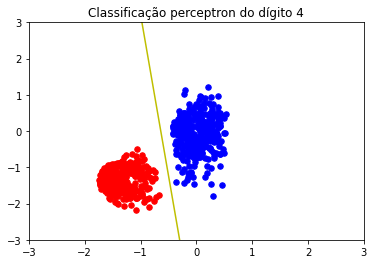

modelo teste métricas
it Numeral 4 - 2
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None
�


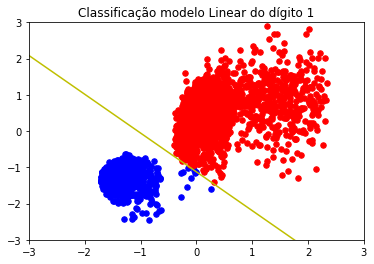

modelo treino métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
2186 2186
------------------ Matriz de confusão ------------------

[[ 608    0]
 [  10 1568]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      1578
           1       0.98      1.00      0.99       608

    accuracy                           1.00      2186
   macro avg       0.99      1.00      0.99      2186
weighted avg       1.00      1.00      1.00      2186

----------------------------------------------------------

None
�


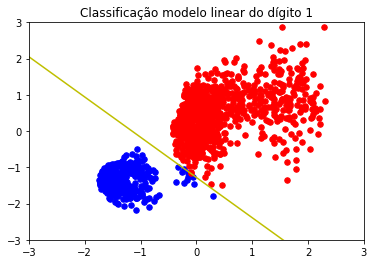

modelo teste métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1115 1115
------------------ Matriz de confusão ------------------

[[292   0]
 [ 11 812]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.99      0.99       823
           1       0.96      1.00      0.98       292

    accuracy                           0.99      1115
   macro avg       0.98      0.99      0.99      1115
weighted avg       0.99      0.99      0.99      1115

----------------------------------------------------------

None


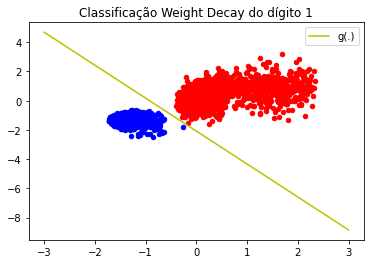

modelo treino métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       608

    accuracy                           1.00      2186
   macro avg       1.00      1.00      1.00      2186
weighted avg       1.00      1.00      1.00      2186

----------------------------------------------------------

None


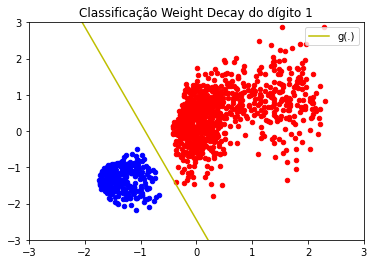

modelo teste métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 823]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       292

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

----------------------------------------------------------

None


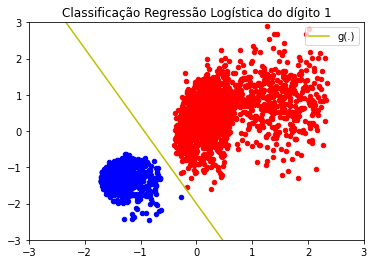

modelo treino métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       608

    accuracy                           1.00      2186
   macro avg       1.00      1.00      1.00      2186
weighted avg       1.00      1.00      1.00      2186

----------------------------------------------------------

None


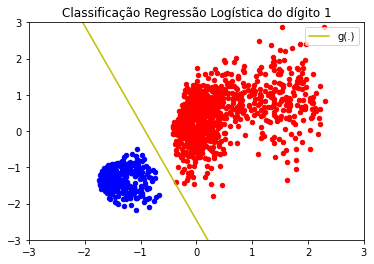

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 823]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       292

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

----------------------------------------------------------

None
Número de iterações:  2


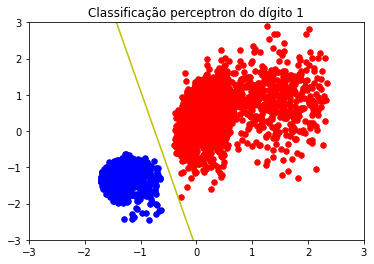

modelo treino métricas
2186 2186
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1578]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1578
           1       1.00      1.00      1.00       608

    accuracy                           1.00      2186
   macro avg       1.00      1.00      1.00      2186
weighted avg       1.00      1.00      1.00      2186

----------------------------------------------------------

None
Número de iterações:  2


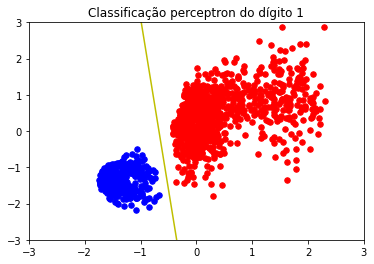

modelo teste métricas
it Numeral 1 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 823]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       292

    accuracy                           1.00      1115
   macro avg       1.00      1.00      1.00      1115
weighted avg       1.00      1.00      1.00      1115

----------------------------------------------------------

None
�


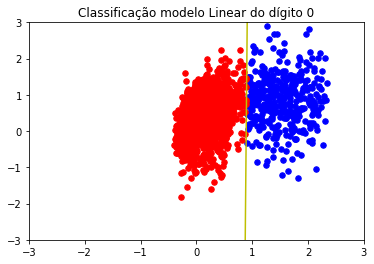

modelo treino métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1578 1578
------------------ Matriz de confusão ------------------

[[ 398   27]
 [   0 1153]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99      1153
           1       1.00      0.94      0.97       425

    accuracy                           0.98      1578
   macro avg       0.99      0.97      0.98      1578
weighted avg       0.98      0.98      0.98      1578

----------------------------------------------------------

None
�


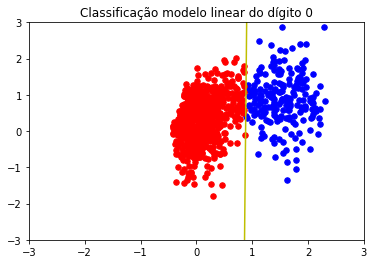

modelo teste métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [ 1  1  1  1  1 -1 -1  1  1  1]
823 823
------------------ Matriz de confusão ------------------

[[204  14]
 [  0 605]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      1.00      0.99       605
           1       1.00      0.94      0.97       218

    accuracy                           0.98       823
   macro avg       0.99      0.97      0.98       823
weighted avg       0.98      0.98      0.98       823

----------------------------------------------------------

None


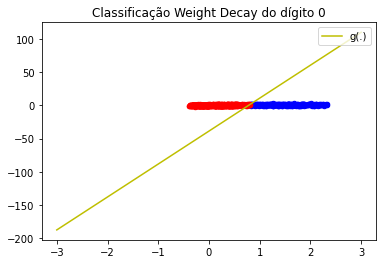

modelo treino métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1578 1578
------------------ Matriz de confusão ------------------

[[ 414   11]
 [   8 1145]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1153
           1       0.98      0.97      0.98       425

    accuracy                           0.99      1578
   macro avg       0.99      0.98      0.98      1578
weighted avg       0.99      0.99      0.99      1578

----------------------------------------------------------

None


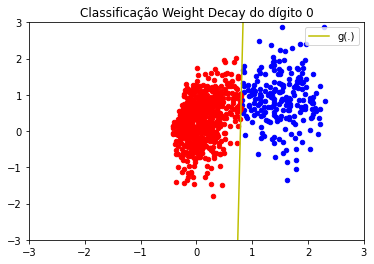

modelo teste métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
823 823
------------------ Matriz de confusão ------------------

[[211   7]
 [  5 600]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       605
           1       0.98      0.97      0.97       218

    accuracy                           0.99       823
   macro avg       0.98      0.98      0.98       823
weighted avg       0.99      0.99      0.99       823

----------------------------------------------------------

None


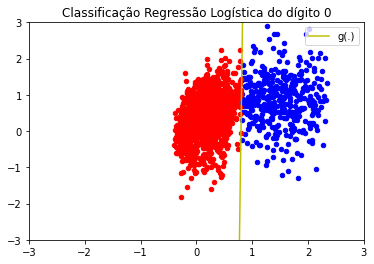

modelo treino métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1578 1578
------------------ Matriz de confusão ------------------

[[ 414   11]
 [   7 1146]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1153
           1       0.98      0.97      0.98       425

    accuracy                           0.99      1578
   macro avg       0.99      0.98      0.99      1578
weighted avg       0.99      0.99      0.99      1578

----------------------------------------------------------

None


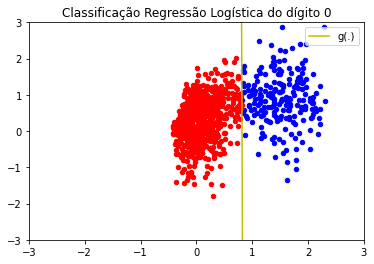

Acurácia:  0.9866342648845686
modelo teste métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
823 823
------------------ Matriz de confusão ------------------

[[211   7]
 [  4 601]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       605
           1       0.98      0.97      0.97       218

    accuracy                           0.99       823
   macro avg       0.98      0.98      0.98       823
weighted avg       0.99      0.99      0.99       823

----------------------------------------------------------

None
Número de iterações:  99


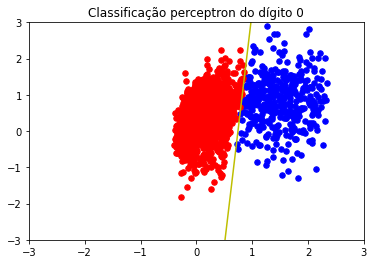

modelo treino métricas
1578 1578
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1578 1578
------------------ Matriz de confusão ------------------

[[ 415   10]
 [   5 1148]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1153
           1       0.99      0.98      0.98       425

    accuracy                           0.99      1578
   macro avg       0.99      0.99      0.99      1578
weighted avg       0.99      0.99      0.99      1578

----------------------------------------------------------

None
Número de iterações:  99


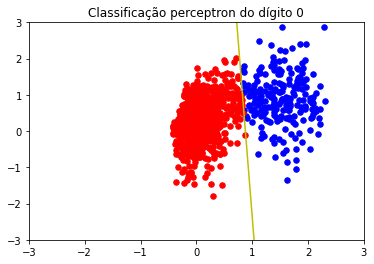

modelo teste métricas
it Numeral 0 - 3
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
823 823
------------------ Matriz de confusão ------------------

[[210   8]
 [  2 603]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99       605
           1       0.99      0.96      0.98       218

    accuracy                           0.99       823
   macro avg       0.99      0.98      0.98       823
weighted avg       0.99      0.99      0.99       823

----------------------------------------------------------

None
�


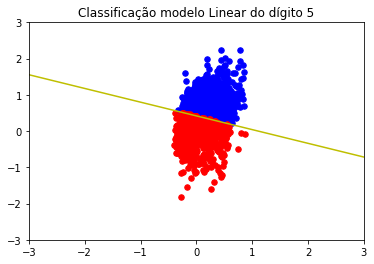

modelo treino métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1  1 -1 -1 -1 -1  1  1 -1 -1]
1153 1153
------------------ Matriz de confusão ------------------

[[468 108]
 [105 472]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.82      0.82       577
           1       0.82      0.81      0.81       576

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------

None
�


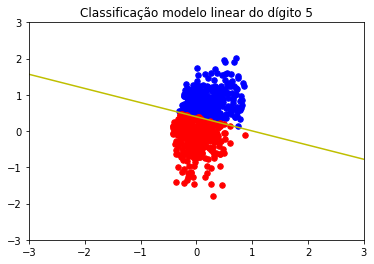

modelo teste métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1  1]
605 605
------------------ Matriz de confusão ------------------

[[237  54]
 [ 56 258]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.83      0.82      0.82       314
           1       0.81      0.81      0.81       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None


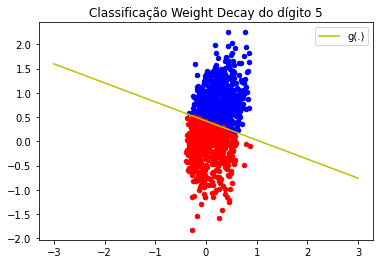

modelo treino métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1.  1.  1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[469 107]
 [105 472]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.82      0.82       577
           1       0.82      0.81      0.82       576

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------

None


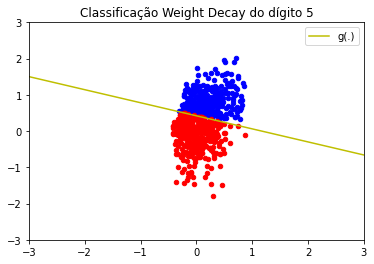

modelo teste métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[227  64]
 [ 48 266]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.85      0.83       314
           1       0.83      0.78      0.80       291

    accuracy                           0.81       605
   macro avg       0.82      0.81      0.81       605
weighted avg       0.82      0.81      0.81       605

----------------------------------------------------------

None


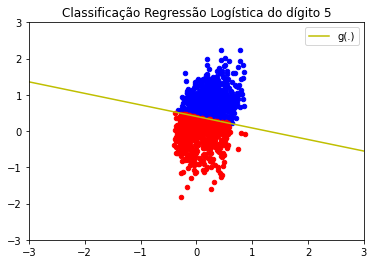

modelo treino métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1.  1.  1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[473 103]
 [107 470]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.81      0.82       577
           1       0.82      0.82      0.82       576

    accuracy                           0.82      1153
   macro avg       0.82      0.82      0.82      1153
weighted avg       0.82      0.82      0.82      1153

----------------------------------------------------------

None


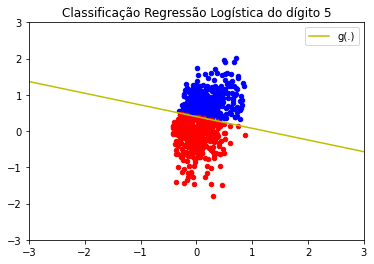

Acurácia:  0.8165289256198347
modelo teste métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[233  58]
 [ 53 261]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.83      0.82       314
           1       0.81      0.80      0.81       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None
Número de iterações:  99


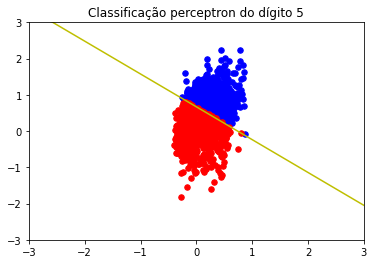

modelo treino métricas
1153 1153
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1.  1. -1. -1. -1. -1. -1. -1. -1. -1.]
1153 1153
------------------ Matriz de confusão ------------------

[[403 173]
 [ 54 523]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.75      0.91      0.82       577
           1       0.88      0.70      0.78       576

    accuracy                           0.80      1153
   macro avg       0.82      0.80      0.80      1153
weighted avg       0.82      0.80      0.80      1153

----------------------------------------------------------

None
Número de iterações:  99


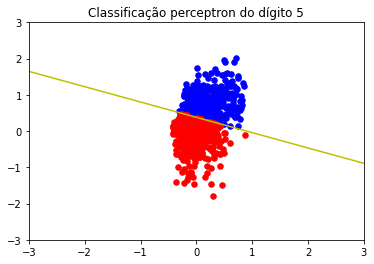

modelo teste métricas
it Numeral 5 - 3
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1.  1.]
605 605
------------------ Matriz de confusão ------------------

[[241  50]
 [ 58 256]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.84      0.82      0.83       314
           1       0.81      0.83      0.82       291

    accuracy                           0.82       605
   macro avg       0.82      0.82      0.82       605
weighted avg       0.82      0.82      0.82       605

----------------------------------------------------------

None
�


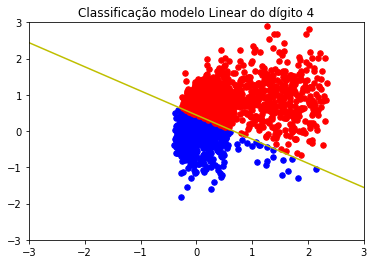

modelo treino métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1578 1578
------------------ Matriz de confusão ------------------

[[467 110]
 [130 871]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.89      0.87      0.88      1001
           1       0.78      0.81      0.80       577

    accuracy                           0.85      1578
   macro avg       0.84      0.84      0.84      1578
weighted avg       0.85      0.85      0.85      1578

----------------------------------------------------------

None
�


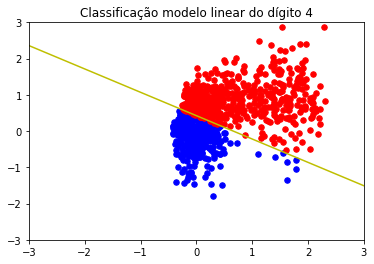

modelo teste métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
823 823
------------------ Matriz de confusão ------------------

[[263  51]
 [ 64 445]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.90      0.87      0.89       509
           1       0.80      0.84      0.82       314

    accuracy                           0.86       823
   macro avg       0.85      0.86      0.85       823
weighted avg       0.86      0.86      0.86       823

----------------------------------------------------------

None


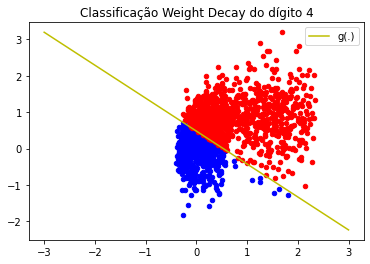

modelo treino métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[463 114]
 [132 869]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.88      0.87      0.88      1001
           1       0.78      0.80      0.79       577

    accuracy                           0.84      1578
   macro avg       0.83      0.84      0.83      1578
weighted avg       0.85      0.84      0.84      1578

----------------------------------------------------------

None


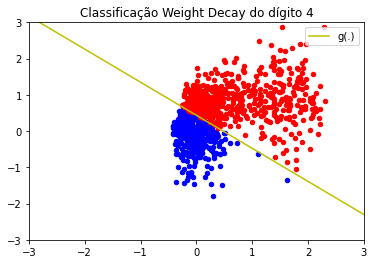

modelo teste métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[258  56]
 [ 62 447]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.89      0.88      0.88       509
           1       0.81      0.82      0.81       314

    accuracy                           0.86       823
   macro avg       0.85      0.85      0.85       823
weighted avg       0.86      0.86      0.86       823

----------------------------------------------------------

None


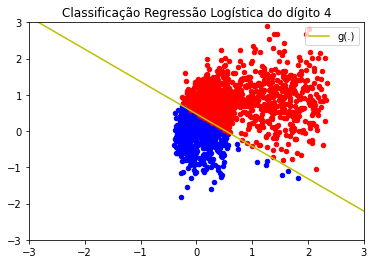

modelo treino métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[462 115]
 [132 869]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.88      0.87      0.88      1001
           1       0.78      0.80      0.79       577

    accuracy                           0.84      1578
   macro avg       0.83      0.83      0.83      1578
weighted avg       0.84      0.84      0.84      1578

----------------------------------------------------------

None


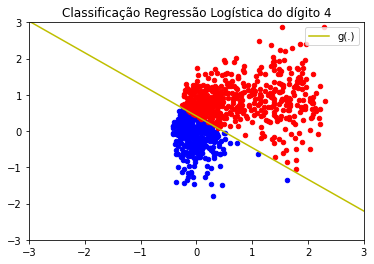

Acurácia:  0.8578371810449574
modelo teste métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[255  59]
 [ 58 451]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.88      0.89      0.89       509
           1       0.81      0.81      0.81       314

    accuracy                           0.86       823
   macro avg       0.85      0.85      0.85       823
weighted avg       0.86      0.86      0.86       823

----------------------------------------------------------

None
Número de iterações:  99


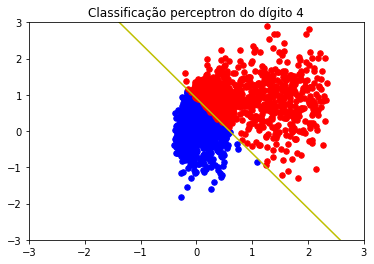

modelo treino métricas
1578 1578
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[536  41]
 [227 774]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      0.77      0.85      1001
           1       0.70      0.93      0.80       577

    accuracy                           0.83      1578
   macro avg       0.83      0.85      0.83      1578
weighted avg       0.86      0.83      0.83      1578

----------------------------------------------------------

None
Número de iterações:  99


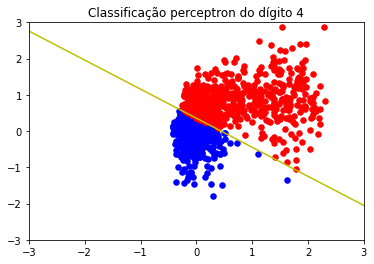

modelo teste métricas
it Numeral 4 - 4
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[247  67]
 [ 47 462]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       509
           1       0.84      0.79      0.81       314

    accuracy                           0.86       823
   macro avg       0.86      0.85      0.85       823
weighted avg       0.86      0.86      0.86       823

----------------------------------------------------------

None
�


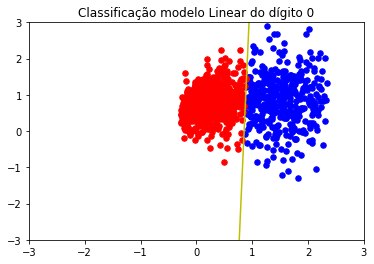

modelo treino métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1001 1001
------------------ Matriz de confusão ------------------

[[403  22]
 [  1 575]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       576
           1       1.00      0.95      0.97       425

    accuracy                           0.98      1001
   macro avg       0.98      0.97      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None
�


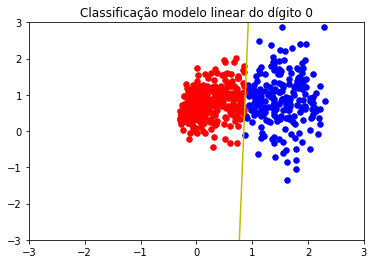

modelo teste métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [ 1  1  1  1  1 -1 -1  1  1  1]
509 509
------------------ Matriz de confusão ------------------

[[204  14]
 [  1 290]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       291
           1       1.00      0.94      0.96       218

    accuracy                           0.97       509
   macro avg       0.97      0.97      0.97       509
weighted avg       0.97      0.97      0.97       509

----------------------------------------------------------

None


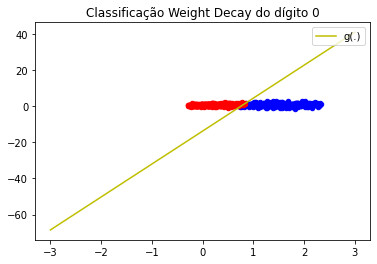

modelo treino métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[415  10]
 [  7 569]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       576
           1       0.98      0.98      0.98       425

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None


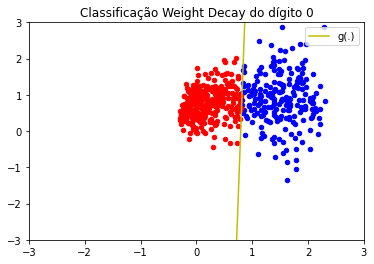

modelo teste métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[211   7]
 [  5 286]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       291
           1       0.98      0.97      0.97       218

    accuracy                           0.98       509
   macro avg       0.98      0.98      0.98       509
weighted avg       0.98      0.98      0.98       509

----------------------------------------------------------

None


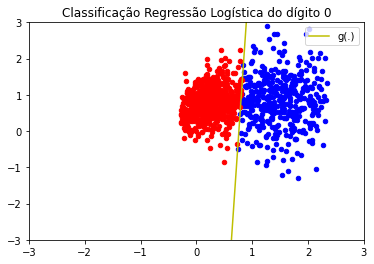

modelo treino métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[414  11]
 [  9 567]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       576
           1       0.98      0.97      0.98       425

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None


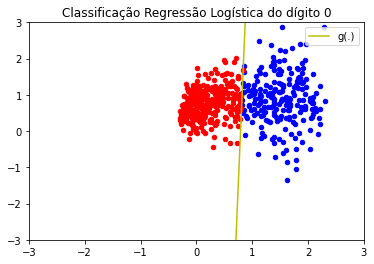

Acurácia:  0.9744597249508841
modelo teste métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[210   8]
 [  5 286]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       291
           1       0.98      0.96      0.97       218

    accuracy                           0.97       509
   macro avg       0.97      0.97      0.97       509
weighted avg       0.97      0.97      0.97       509

----------------------------------------------------------

None
Número de iterações:  99


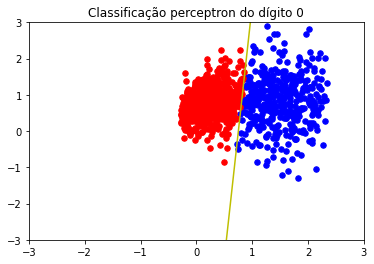

modelo treino métricas
1001 1001
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[415  10]
 [  5 571]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       576
           1       0.99      0.98      0.98       425

    accuracy                           0.99      1001
   macro avg       0.99      0.98      0.98      1001
weighted avg       0.99      0.99      0.99      1001

----------------------------------------------------------

None
Número de iterações:  99


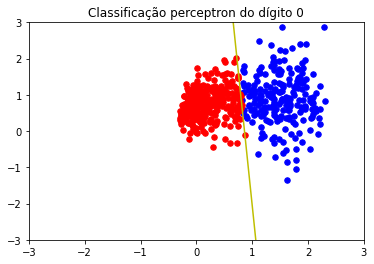

modelo teste métricas
it Numeral 0 - 4
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[211   7]
 [  3 288]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98       291
           1       0.99      0.97      0.98       218

    accuracy                           0.98       509
   macro avg       0.98      0.98      0.98       509
weighted avg       0.98      0.98      0.98       509

----------------------------------------------------------

None
�


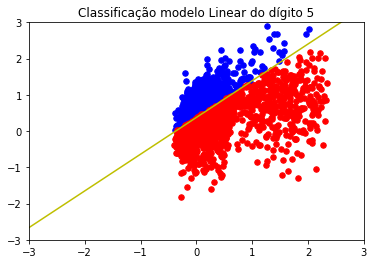

modelo treino métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
1578 1578
------------------ Matriz de confusão ------------------

[[383 193]
 [142 860]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.86      0.84      1002
           1       0.73      0.66      0.70       576

    accuracy                           0.79      1578
   macro avg       0.77      0.76      0.77      1578
weighted avg       0.78      0.79      0.79      1578

----------------------------------------------------------

None
�


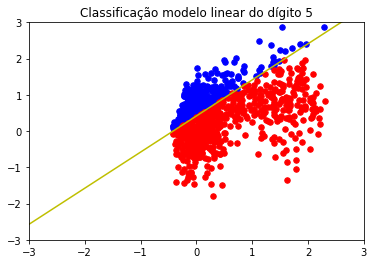

modelo teste métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1  1 -1 -1 -1]
823 823
------------------ Matriz de confusão ------------------

[[190 101]
 [ 81 451]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.82      0.85      0.83       532
           1       0.70      0.65      0.68       291

    accuracy                           0.78       823
   macro avg       0.76      0.75      0.75       823
weighted avg       0.78      0.78      0.78       823

----------------------------------------------------------

None


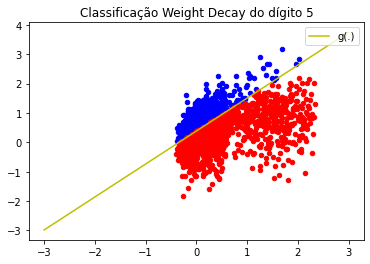

modelo treino métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[370 206]
 [136 866]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.86      0.84      1002
           1       0.73      0.64      0.68       576

    accuracy                           0.78      1578
   macro avg       0.77      0.75      0.76      1578
weighted avg       0.78      0.78      0.78      1578

----------------------------------------------------------

None


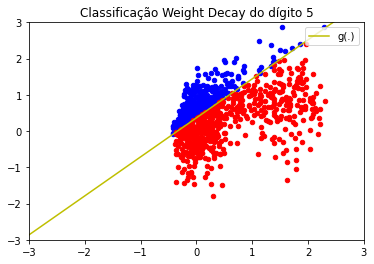

modelo teste métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[199  92]
 [ 87 445]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.83      0.84      0.83       532
           1       0.70      0.68      0.69       291

    accuracy                           0.78       823
   macro avg       0.76      0.76      0.76       823
weighted avg       0.78      0.78      0.78       823

----------------------------------------------------------

None


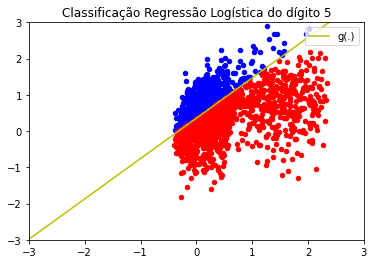

modelo treino métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[379 197]
 [148 854]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.85      0.83      1002
           1       0.72      0.66      0.69       576

    accuracy                           0.78      1578
   macro avg       0.77      0.76      0.76      1578
weighted avg       0.78      0.78      0.78      1578

----------------------------------------------------------

None


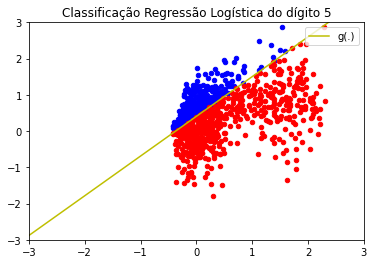

Acurácia:  0.7825030376670716
modelo teste métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[185 106]
 [ 73 459]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.81      0.86      0.84       532
           1       0.72      0.64      0.67       291

    accuracy                           0.78       823
   macro avg       0.76      0.75      0.76       823
weighted avg       0.78      0.78      0.78       823

----------------------------------------------------------

None
Número de iterações:  99


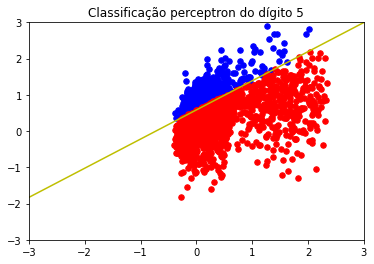

modelo treino métricas
1578 1578
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
1578 1578
------------------ Matriz de confusão ------------------

[[301 275]
 [ 75 927]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.77      0.93      0.84      1002
           1       0.80      0.52      0.63       576

    accuracy                           0.78      1578
   macro avg       0.79      0.72      0.74      1578
weighted avg       0.78      0.78      0.76      1578

----------------------------------------------------------

None
Número de iterações:  99


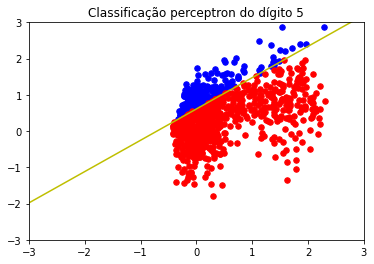

modelo teste métricas
it Numeral 5 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1.  1. -1. -1. -1.]
823 823
------------------ Matriz de confusão ------------------

[[148 143]
 [ 48 484]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.77      0.91      0.84       532
           1       0.76      0.51      0.61       291

    accuracy                           0.77       823
   macro avg       0.76      0.71      0.72       823
weighted avg       0.77      0.77      0.75       823

----------------------------------------------------------

None
�


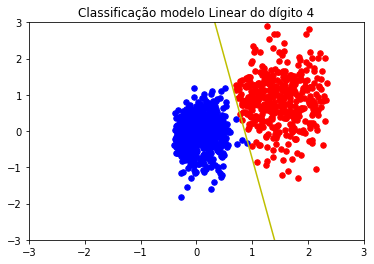

modelo treino métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1002 1002
------------------ Matriz de confusão ------------------

[[577   0]
 [  4 421]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       425
           1       0.99      1.00      1.00       577

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None
�


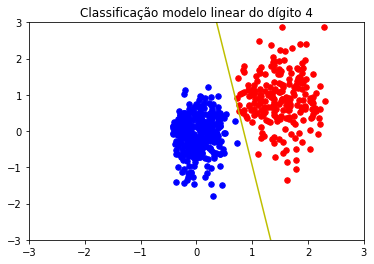

modelo teste métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
532 532
------------------ Matriz de confusão ------------------

[[314   0]
 [  2 216]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00       218
           1       0.99      1.00      1.00       314

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None


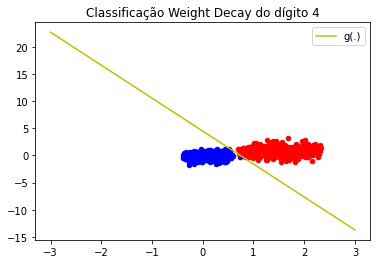

modelo treino métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1002 1002
------------------ Matriz de confusão ------------------

[[577   0]
 [  1 424]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None


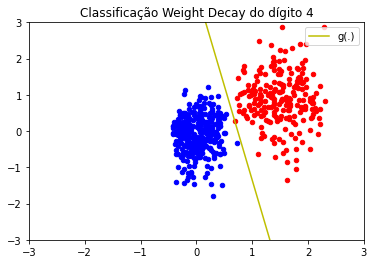

modelo teste métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
532 532
------------------ Matriz de confusão ------------------

[[314   0]
 [  1 217]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       314

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None


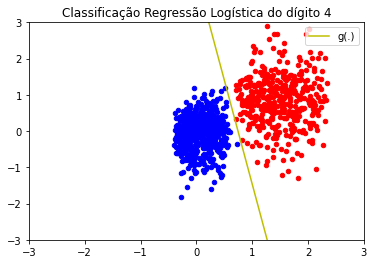

modelo treino métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1002 1002
------------------ Matriz de confusão ------------------

[[577   0]
 [  1 424]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None


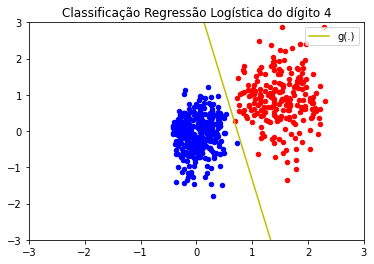

Acurácia:  0.9981203007518797
modelo teste métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
532 532
------------------ Matriz de confusão ------------------

[[314   0]
 [  1 217]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       314

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None
Número de iterações:  15


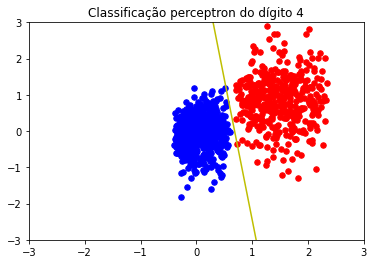

modelo treino métricas
1002 1002
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1002 1002
------------------ Matriz de confusão ------------------

[[577   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None
Número de iterações:  12


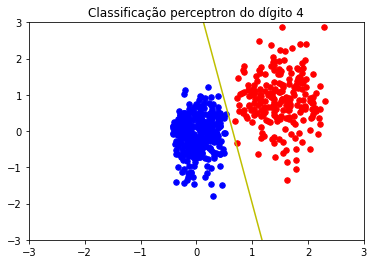

modelo teste métricas
it Numeral 4 - 5
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
532 532
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       314

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None
�


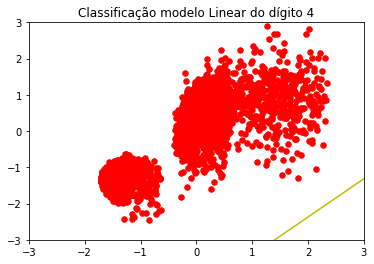

modelo treino métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
2186 2186
------------------ Matriz de confusão ------------------

[[   0  577]
 [   0 1609]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.74      1.00      0.85      1609
           1       0.00      0.00      0.00       577

    accuracy                           0.74      2186
   macro avg       0.37      0.50      0.42      2186
weighted avg       0.54      0.74      0.62      2186

----------------------------------------------------------

None
�


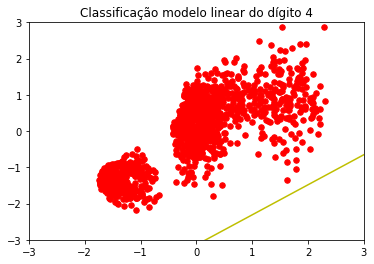

modelo teste métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1115 1115
------------------ Matriz de confusão ------------------

[[  0 314]
 [  0 801]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.72      1.00      0.84       801
           1       0.00      0.00      0.00       314

    accuracy                           0.72      1115
   macro avg       0.36      0.50      0.42      1115
weighted avg       0.52      0.72      0.60      1115

----------------------------------------------------------

None


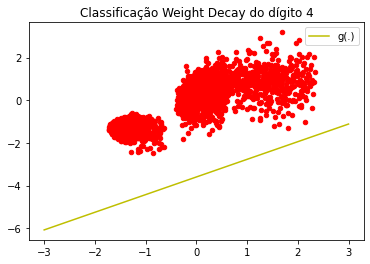

modelo treino métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[   0  577]
 [   0 1609]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.74      1.00      0.85      1609
           1       0.00      0.00      0.00       577

    accuracy                           0.74      2186
   macro avg       0.37      0.50      0.42      2186
weighted avg       0.54      0.74      0.62      2186

----------------------------------------------------------

None


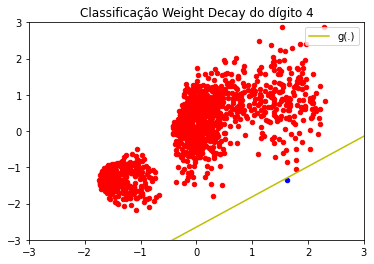

modelo teste métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[  0 314]
 [  1 800]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.72      1.00      0.84       801
           1       0.00      0.00      0.00       314

    accuracy                           0.72      1115
   macro avg       0.36      0.50      0.42      1115
weighted avg       0.52      0.72      0.60      1115

----------------------------------------------------------

None


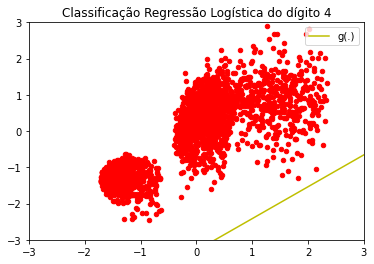

modelo treino métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[   0  577]
 [   0 1609]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.74      1.00      0.85      1609
           1       0.00      0.00      0.00       577

    accuracy                           0.74      2186
   macro avg       0.37      0.50      0.42      2186
weighted avg       0.54      0.74      0.62      2186

----------------------------------------------------------

None


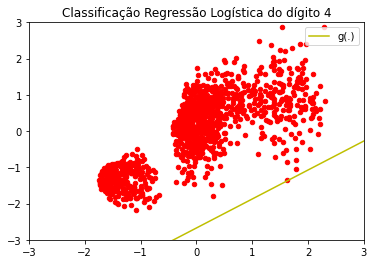

Acurácia:  0.7183856502242152
modelo teste métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[  0 314]
 [  0 801]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.72      1.00      0.84       801
           1       0.00      0.00      0.00       314

    accuracy                           0.72      1115
   macro avg       0.36      0.50      0.42      1115
weighted avg       0.52      0.72      0.60      1115

----------------------------------------------------------

None
Número de iterações:  99


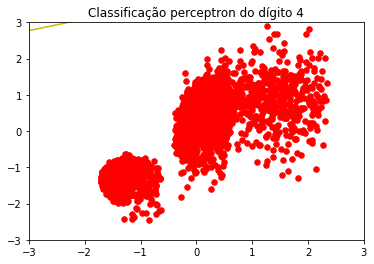

modelo treino métricas
2186 2186
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[   0  577]
 [   0 1609]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.74      1.00      0.85      1609
           1       0.00      0.00      0.00       577

    accuracy                           0.74      2186
   macro avg       0.37      0.50      0.42      2186
weighted avg       0.54      0.74      0.62      2186

----------------------------------------------------------

None
Número de iterações:  99


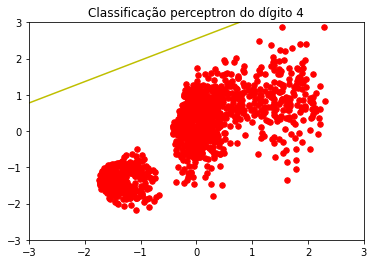

modelo teste métricas
it Numeral 4 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[  0 314]
 [  0 801]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.72      1.00      0.84       801
           1       0.00      0.00      0.00       314

    accuracy                           0.72      1115
   macro avg       0.36      0.50      0.42      1115
weighted avg       0.52      0.72      0.60      1115

----------------------------------------------------------

None
�


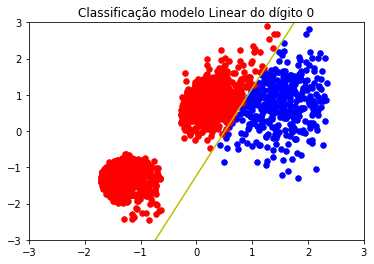

modelo treino métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1609 1609
------------------ Matriz de confusão ------------------

[[ 386   39]
 [  15 1169]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.97      0.99      0.98      1184
           1       0.96      0.91      0.93       425

    accuracy                           0.97      1609
   macro avg       0.97      0.95      0.96      1609
weighted avg       0.97      0.97      0.97      1609

----------------------------------------------------------

None
�


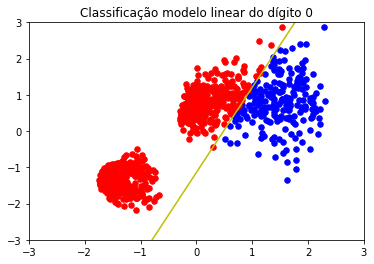

modelo teste métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [ 1  1  1  1  1 -1 -1  1  1  1]
801 801
------------------ Matriz de confusão ------------------

[[200  18]
 [ 13 570]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.97      0.98      0.97       583
           1       0.94      0.92      0.93       218

    accuracy                           0.96       801
   macro avg       0.95      0.95      0.95       801
weighted avg       0.96      0.96      0.96       801

----------------------------------------------------------

None


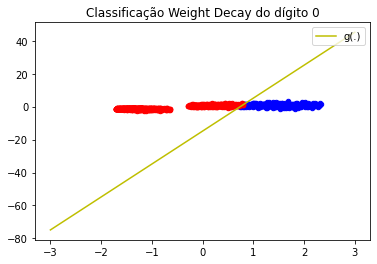

modelo treino métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 417    8]
 [  11 1173]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1184
           1       0.97      0.98      0.98       425

    accuracy                           0.99      1609
   macro avg       0.98      0.99      0.98      1609
weighted avg       0.99      0.99      0.99      1609

----------------------------------------------------------

None


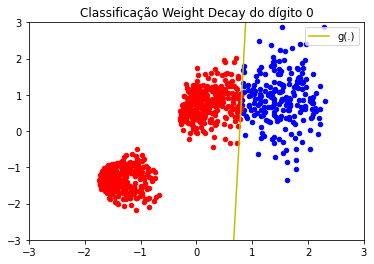

modelo teste métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
801 801
------------------ Matriz de confusão ------------------

[[211   7]
 [  5 578]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       583
           1       0.98      0.97      0.97       218

    accuracy                           0.99       801
   macro avg       0.98      0.98      0.98       801
weighted avg       0.98      0.99      0.98       801

----------------------------------------------------------

None


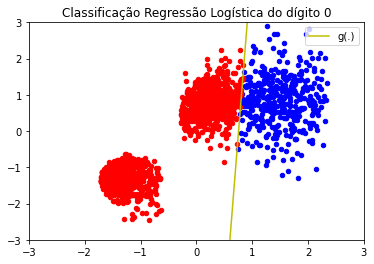

modelo treino métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 414   11]
 [   7 1177]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99      1184
           1       0.98      0.97      0.98       425

    accuracy                           0.99      1609
   macro avg       0.99      0.98      0.99      1609
weighted avg       0.99      0.99      0.99      1609

----------------------------------------------------------

None


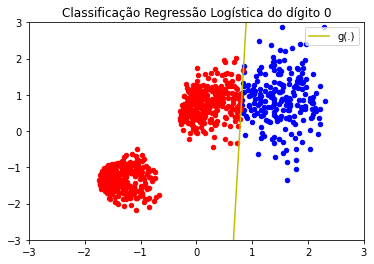

Acurácia:  0.9837702871410736
modelo teste métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
801 801
------------------ Matriz de confusão ------------------

[[210   8]
 [  5 578]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       583
           1       0.98      0.96      0.97       218

    accuracy                           0.98       801
   macro avg       0.98      0.98      0.98       801
weighted avg       0.98      0.98      0.98       801

----------------------------------------------------------

None
Número de iterações:  99


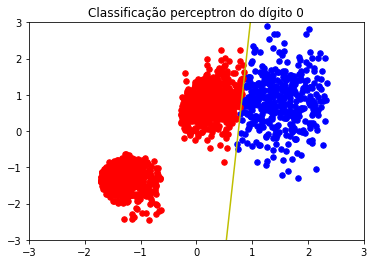

modelo treino métricas
1609 1609
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 415   10]
 [   5 1179]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      0.99      1184
           1       0.99      0.98      0.98       425

    accuracy                           0.99      1609
   macro avg       0.99      0.99      0.99      1609
weighted avg       0.99      0.99      0.99      1609

----------------------------------------------------------

None
Número de iterações:  99


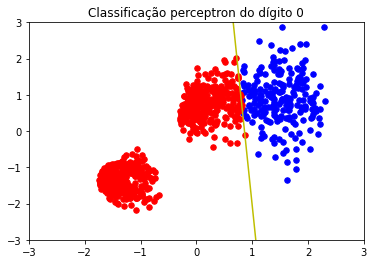

modelo teste métricas
it Numeral 0 - 6
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
801 801
------------------ Matriz de confusão ------------------

[[211   7]
 [  3 580]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.99      0.99       583
           1       0.99      0.97      0.98       218

    accuracy                           0.99       801
   macro avg       0.99      0.98      0.98       801
weighted avg       0.99      0.99      0.99       801

----------------------------------------------------------

None
�


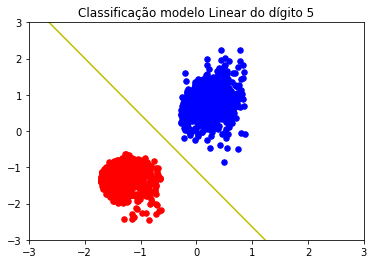

modelo treino métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1184 1184
------------------ Matriz de confusão ------------------

[[576   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None
�


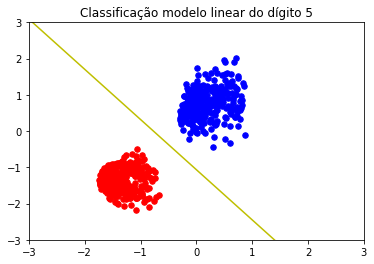

modelo teste métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
583 583
------------------ Matriz de confusão ------------------

[[291   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None


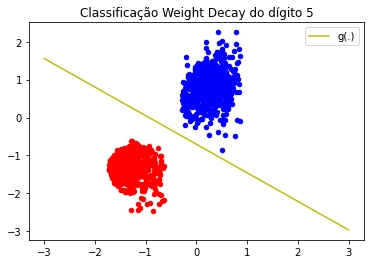

modelo treino métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1184 1184
------------------ Matriz de confusão ------------------

[[576   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None


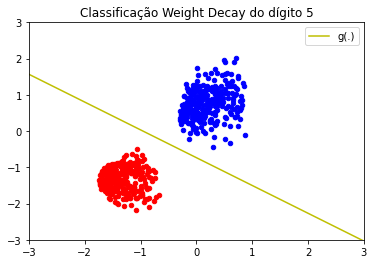

modelo teste métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
583 583
------------------ Matriz de confusão ------------------

[[291   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None


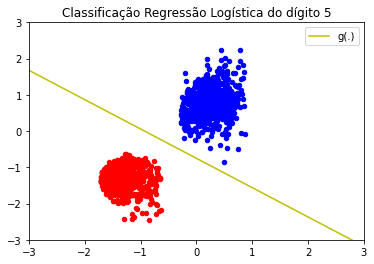

modelo treino métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1184 1184
------------------ Matriz de confusão ------------------

[[576   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None


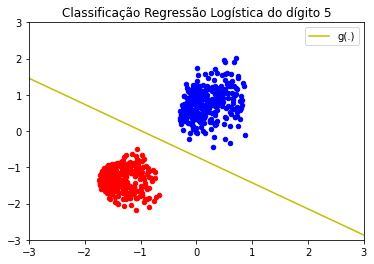

Acurácia:  1.0
modelo teste métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
583 583
------------------ Matriz de confusão ------------------

[[291   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None
Número de iterações:  1


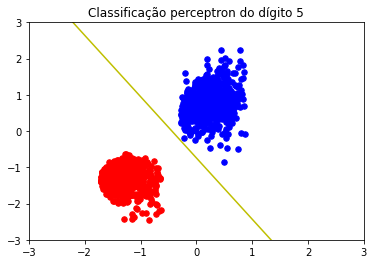

modelo treino métricas
1184 1184
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1184 1184
------------------ Matriz de confusão ------------------

[[576   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       576

    accuracy                           1.00      1184
   macro avg       1.00      1.00      1.00      1184
weighted avg       1.00      1.00      1.00      1184

----------------------------------------------------------

None
Número de iterações:  1


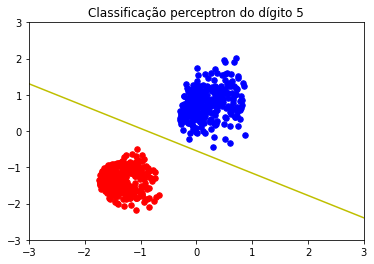

modelo teste métricas
it Numeral 5 - 6
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
583 583
------------------ Matriz de confusão ------------------

[[291   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

----------------------------------------------------------

None
�


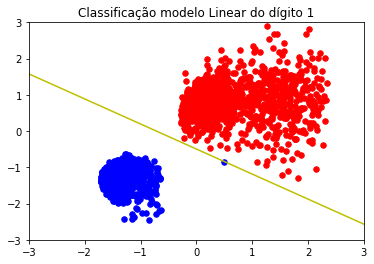

modelo treino métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1609 1609
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1000]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609

----------------------------------------------------------

None
�


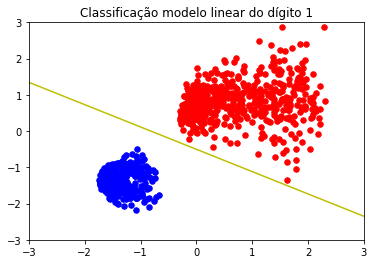

modelo teste métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
801 801
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 509]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       292

    accuracy                           1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801

----------------------------------------------------------

None


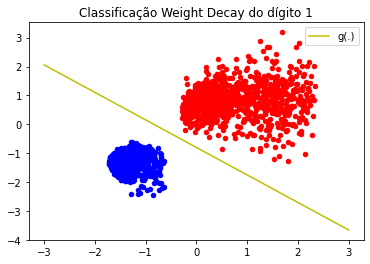

modelo treino métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1001]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609

----------------------------------------------------------

None


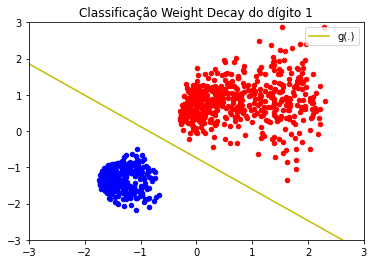

modelo teste métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
801 801
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 509]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       292

    accuracy                           1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801

----------------------------------------------------------

None


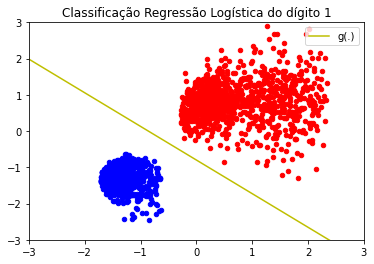

modelo treino métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1001]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609

----------------------------------------------------------

None


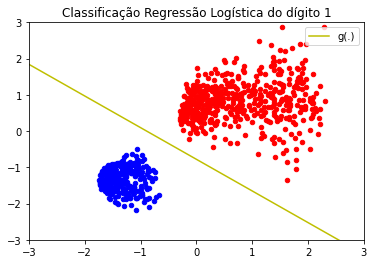

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
801 801
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 509]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       292

    accuracy                           1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801

----------------------------------------------------------

None
Número de iterações:  1


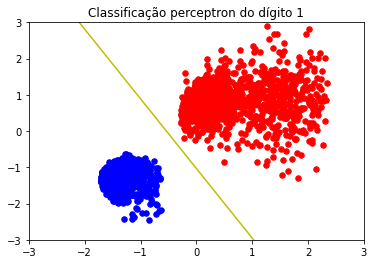

modelo treino métricas
1609 1609
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1609 1609
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1001]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1001
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1609
   macro avg       1.00      1.00      1.00      1609
weighted avg       1.00      1.00      1.00      1609

----------------------------------------------------------

None
Número de iterações:  1


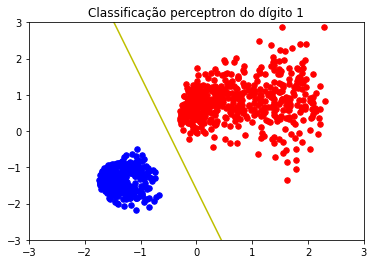

modelo teste métricas
it Numeral 1 - 7
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
801 801
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 509]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       509
           1       1.00      1.00      1.00       292

    accuracy                           1.00       801
   macro avg       1.00      1.00      1.00       801
weighted avg       1.00      1.00      1.00       801

----------------------------------------------------------

None
�


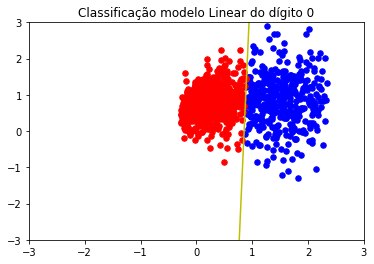

modelo treino métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1001 1001
------------------ Matriz de confusão ------------------

[[403  22]
 [  1 575]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.96      1.00      0.98       576
           1       1.00      0.95      0.97       425

    accuracy                           0.98      1001
   macro avg       0.98      0.97      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None
�


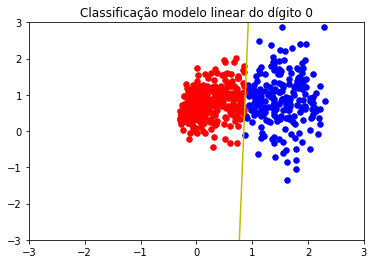

modelo teste métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [ 1  1  1  1  1 -1 -1  1  1  1]
509 509
------------------ Matriz de confusão ------------------

[[204  14]
 [  1 290]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      1.00      0.97       291
           1       1.00      0.94      0.96       218

    accuracy                           0.97       509
   macro avg       0.97      0.97      0.97       509
weighted avg       0.97      0.97      0.97       509

----------------------------------------------------------

None


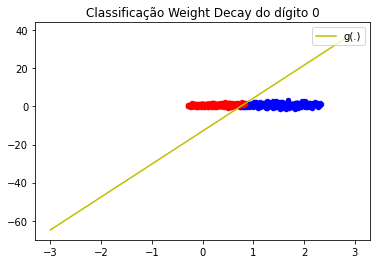

modelo treino métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[415  10]
 [  8 568]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98       576
           1       0.98      0.98      0.98       425

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None


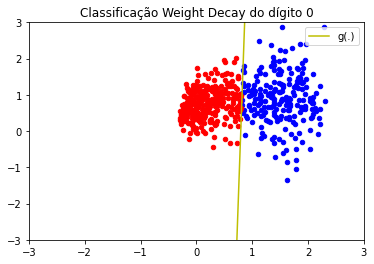

modelo teste métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[211   7]
 [  5 286]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       291
           1       0.98      0.97      0.97       218

    accuracy                           0.98       509
   macro avg       0.98      0.98      0.98       509
weighted avg       0.98      0.98      0.98       509

----------------------------------------------------------

None


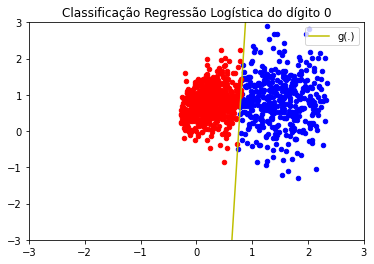

modelo treino métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[415  10]
 [ 10 566]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       576
           1       0.98      0.98      0.98       425

    accuracy                           0.98      1001
   macro avg       0.98      0.98      0.98      1001
weighted avg       0.98      0.98      0.98      1001

----------------------------------------------------------

None


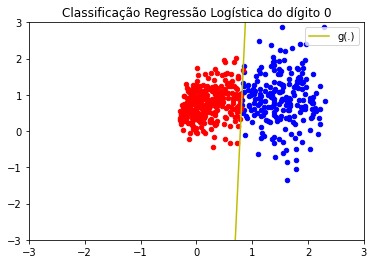

Acurácia:  0.9744597249508841
modelo teste métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[210   8]
 [  5 286]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.97      0.98      0.98       291
           1       0.98      0.96      0.97       218

    accuracy                           0.97       509
   macro avg       0.97      0.97      0.97       509
weighted avg       0.97      0.97      0.97       509

----------------------------------------------------------

None
Número de iterações:  99


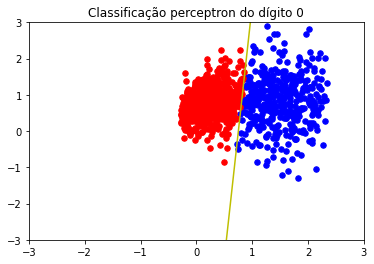

modelo treino métricas
1001 1001
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1001 1001
------------------ Matriz de confusão ------------------

[[415  10]
 [  5 571]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.99       576
           1       0.99      0.98      0.98       425

    accuracy                           0.99      1001
   macro avg       0.99      0.98      0.98      1001
weighted avg       0.99      0.99      0.99      1001

----------------------------------------------------------

None
Número de iterações:  99


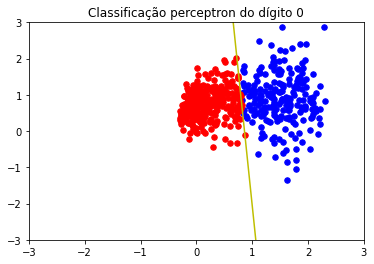

modelo teste métricas
it Numeral 0 - 7
[1 1 1 1 1 1 1 1 1 1] [ 1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
509 509
------------------ Matriz de confusão ------------------

[[211   7]
 [  3 288]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.98      0.99      0.98       291
           1       0.99      0.97      0.98       218

    accuracy                           0.98       509
   macro avg       0.98      0.98      0.98       509
weighted avg       0.98      0.98      0.98       509

----------------------------------------------------------

None
�


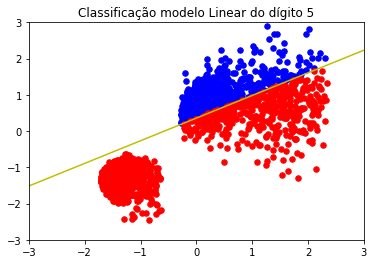

modelo treino métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1  1 -1  1  1 -1 -1 -1]
1609 1609
------------------ Matriz de confusão ------------------

[[425 151]
 [121 912]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.86      0.88      0.87      1033
           1       0.78      0.74      0.76       576

    accuracy                           0.83      1609
   macro avg       0.82      0.81      0.81      1609
weighted avg       0.83      0.83      0.83      1609

----------------------------------------------------------

None
�


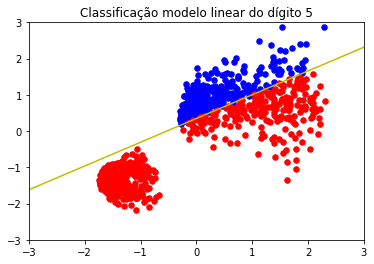

modelo teste métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1 -1 -1  1  1  1 -1 -1]
801 801
------------------ Matriz de confusão ------------------

[[222  69]
 [ 57 453]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.89      0.88       510
           1       0.80      0.76      0.78       291

    accuracy                           0.84       801
   macro avg       0.83      0.83      0.83       801
weighted avg       0.84      0.84      0.84       801

----------------------------------------------------------

None


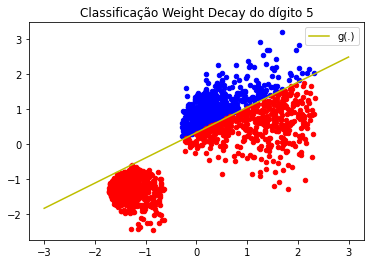

modelo treino métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1. -1. -1. -1.]
1609 1609
------------------ Matriz de confusão ------------------

[[431 145]
 [102 931]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88      1033
           1       0.81      0.75      0.78       576

    accuracy                           0.85      1609
   macro avg       0.84      0.82      0.83      1609
weighted avg       0.84      0.85      0.85      1609

----------------------------------------------------------

None


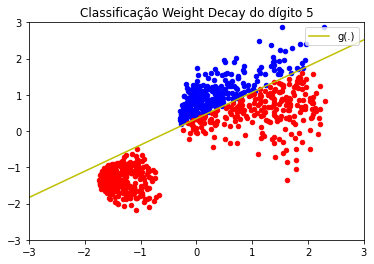

modelo teste métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1.  1. -1. -1.]
801 801
------------------ Matriz de confusão ------------------

[[221  70]
 [ 51 459]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.90      0.88       510
           1       0.81      0.76      0.79       291

    accuracy                           0.85       801
   macro avg       0.84      0.83      0.83       801
weighted avg       0.85      0.85      0.85       801

----------------------------------------------------------

None


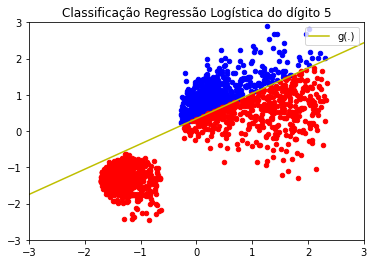

modelo treino métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1. -1. -1. -1.]
1609 1609
------------------ Matriz de confusão ------------------

[[419 157]
 [102 931]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.86      0.90      0.88      1033
           1       0.80      0.73      0.76       576

    accuracy                           0.84      1609
   macro avg       0.83      0.81      0.82      1609
weighted avg       0.84      0.84      0.84      1609

----------------------------------------------------------

None


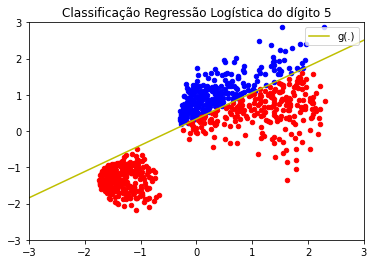

Acurácia:  0.8514357053682896
modelo teste métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1.  1. -1. -1.]
801 801
------------------ Matriz de confusão ------------------

[[224  67]
 [ 52 458]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.90      0.89       510
           1       0.81      0.77      0.79       291

    accuracy                           0.85       801
   macro avg       0.84      0.83      0.84       801
weighted avg       0.85      0.85      0.85       801

----------------------------------------------------------

None
Número de iterações:  99


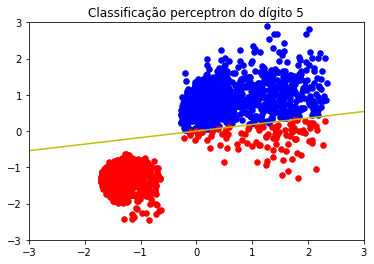

modelo treino métricas
1609 1609
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1609 1609
------------------ Matriz de confusão ------------------

[[548  28]
 [348 685]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.96      0.66      0.78      1033
           1       0.61      0.95      0.74       576

    accuracy                           0.77      1609
   macro avg       0.79      0.81      0.76      1609
weighted avg       0.84      0.77      0.77      1609

----------------------------------------------------------

None
Número de iterações:  99


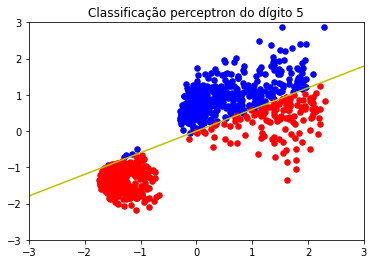

modelo teste métricas
it Numeral 5 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1.  1. -1.  1.]
801 801
------------------ Matriz de confusão ------------------

[[270  21]
 [115 395]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      0.77      0.85       510
           1       0.70      0.93      0.80       291

    accuracy                           0.83       801
   macro avg       0.83      0.85      0.83       801
weighted avg       0.86      0.83      0.83       801

----------------------------------------------------------

None
�


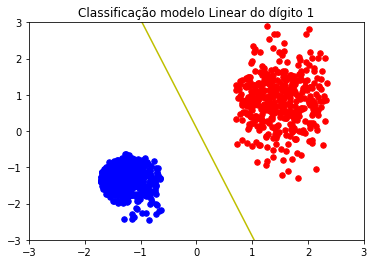

modelo treino métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None
�


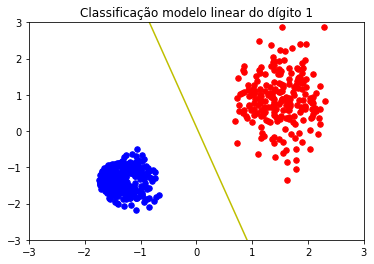

modelo teste métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None


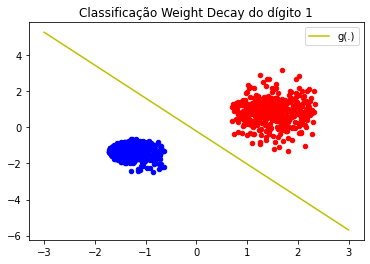

modelo treino métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None


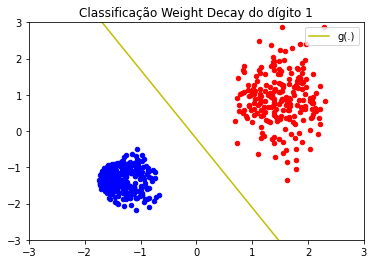

modelo teste métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None


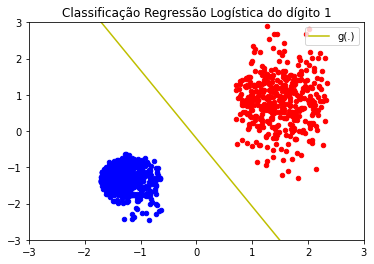

modelo treino métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None


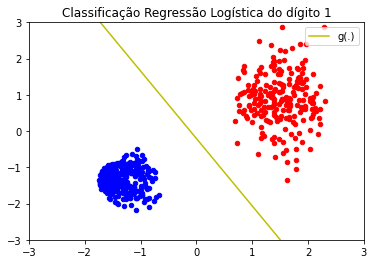

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None
Número de iterações:  1


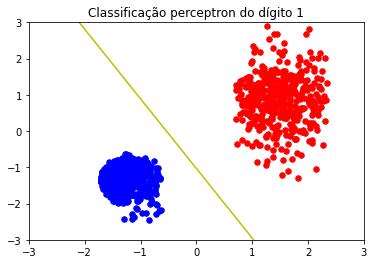

modelo treino métricas
1033 1033
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None
Número de iterações:  1


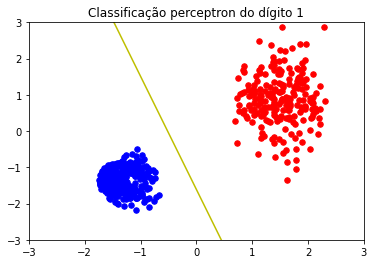

modelo teste métricas
it Numeral 1 - 8
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None
�


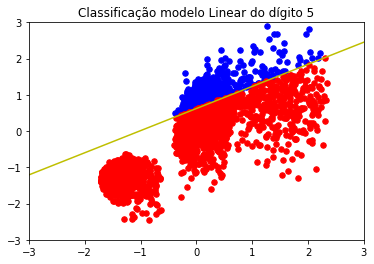

modelo treino métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1 -1 -1 -1  1 -1 -1 -1]
2186 2186
------------------ Matriz de confusão ------------------

[[ 293  283]
 [ 108 1502]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.84      0.93      0.88      1610
           1       0.73      0.51      0.60       576

    accuracy                           0.82      2186
   macro avg       0.79      0.72      0.74      2186
weighted avg       0.81      0.82      0.81      2186

----------------------------------------------------------

None
�


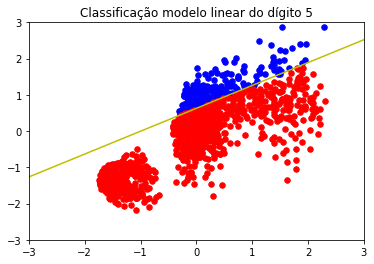

modelo teste métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1 -1 -1 -1  1 -1 -1 -1]
1115 1115
------------------ Matriz de confusão ------------------

[[156 135]
 [ 59 765]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.85      0.93      0.89       824
           1       0.73      0.54      0.62       291

    accuracy                           0.83      1115
   macro avg       0.79      0.73      0.75      1115
weighted avg       0.82      0.83      0.82      1115

----------------------------------------------------------

None


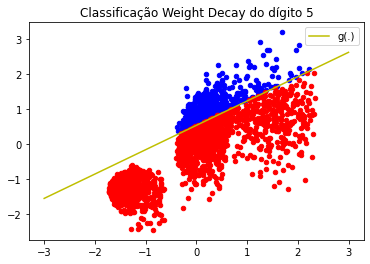

modelo treino métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 338  238]
 [ 128 1482]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.86      0.92      0.89      1610
           1       0.73      0.59      0.65       576

    accuracy                           0.83      2186
   macro avg       0.79      0.75      0.77      2186
weighted avg       0.83      0.83      0.83      2186

----------------------------------------------------------

None


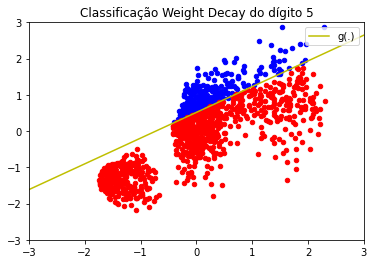

modelo teste métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[179 112]
 [ 73 751]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89       824
           1       0.71      0.62      0.66       291

    accuracy                           0.83      1115
   macro avg       0.79      0.76      0.77      1115
weighted avg       0.83      0.83      0.83      1115

----------------------------------------------------------

None


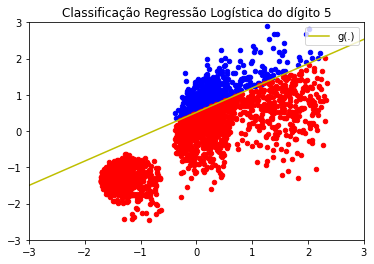

modelo treino métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1. -1. -1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 347  229]
 [ 140 1470]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.87      0.91      0.89      1610
           1       0.71      0.60      0.65       576

    accuracy                           0.83      2186
   macro avg       0.79      0.76      0.77      2186
weighted avg       0.82      0.83      0.83      2186

----------------------------------------------------------

None


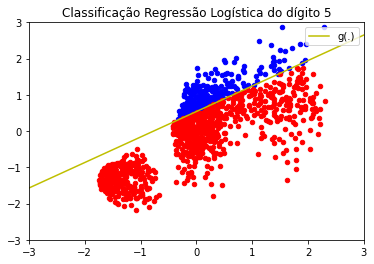

Acurácia:  0.831390134529148
modelo teste métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1. -1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[173 118]
 [ 70 754]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.86      0.92      0.89       824
           1       0.71      0.59      0.65       291

    accuracy                           0.83      1115
   macro avg       0.79      0.75      0.77      1115
weighted avg       0.82      0.83      0.83      1115

----------------------------------------------------------

None
Número de iterações:  99


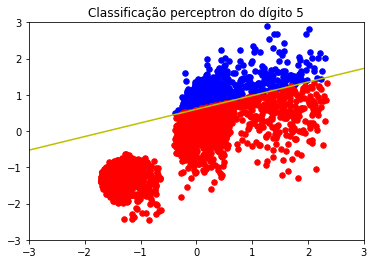

modelo treino métricas
2186 2186
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1.  1. -1.  1.  1. -1.  1. -1.]
2186 2186
------------------ Matriz de confusão ------------------

[[ 332  244]
 [ 186 1424]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.85      0.88      0.87      1610
           1       0.64      0.58      0.61       576

    accuracy                           0.80      2186
   macro avg       0.75      0.73      0.74      2186
weighted avg       0.80      0.80      0.80      2186

----------------------------------------------------------

None
Número de iterações:  99


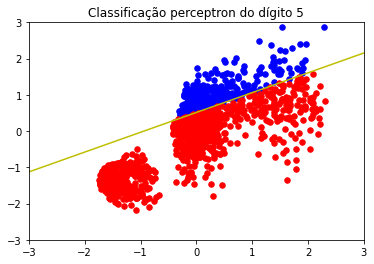

modelo teste métricas
it Numeral 5 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1.  1. -1. -1.]
1115 1115
------------------ Matriz de confusão ------------------

[[191 100]
 [ 89 735]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.88      0.89      0.89       824
           1       0.68      0.66      0.67       291

    accuracy                           0.83      1115
   macro avg       0.78      0.77      0.78      1115
weighted avg       0.83      0.83      0.83      1115

----------------------------------------------------------

None
�


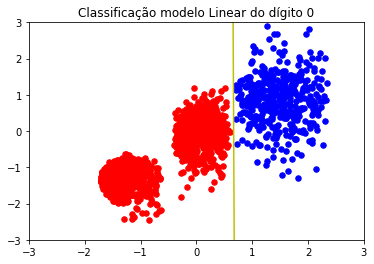

modelo treino métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1610 1610
------------------ Matriz de confusão ------------------

[[ 425    0]
 [   0 1185]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None
�


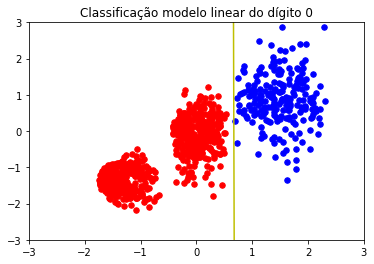

modelo teste métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
824 824
------------------ Matriz de confusão ------------------

[[218   0]
 [  0 606]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       218

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None


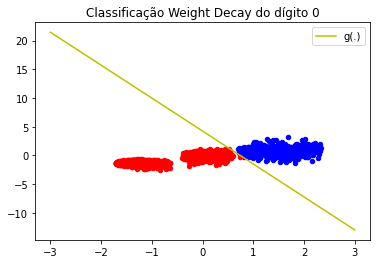

modelo treino métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 424    1]
 [   0 1185]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None


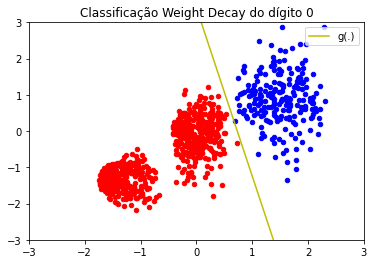

modelo teste métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
824 824
------------------ Matriz de confusão ------------------

[[217   1]
 [  0 606]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       218

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None


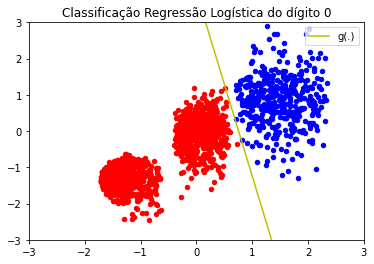

modelo treino métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 424    1]
 [   0 1185]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None


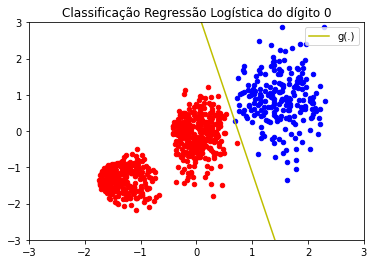

Acurácia:  0.9987864077669902
modelo teste métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
824 824
------------------ Matriz de confusão ------------------

[[217   1]
 [  0 606]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       218

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None
Número de iterações:  15


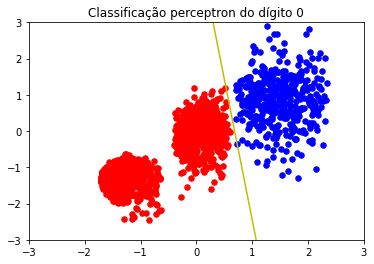

modelo treino métricas
1610 1610
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 425    0]
 [   0 1185]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1185
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None
Número de iterações:  12


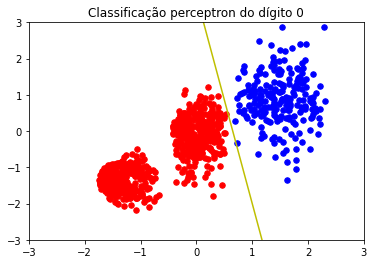

modelo teste métricas
it Numeral 0 - 9
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
824 824
------------------ Matriz de confusão ------------------

[[218   0]
 [  0 606]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       606
           1       1.00      1.00      1.00       218

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None
�


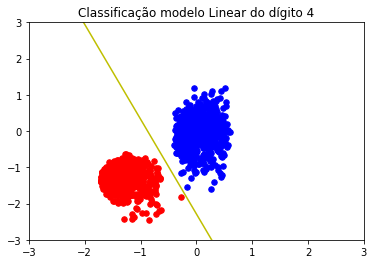

modelo treino métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None
�


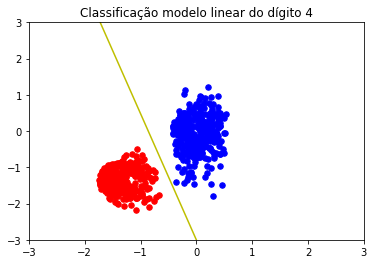

modelo teste métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None


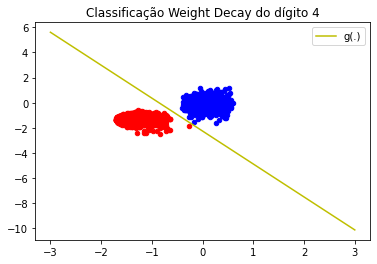

modelo treino métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None


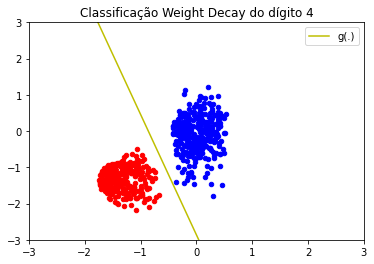

modelo teste métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None


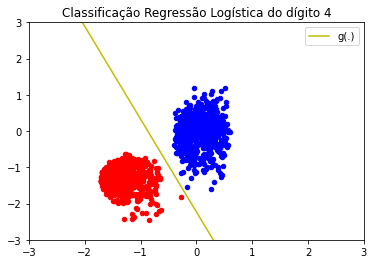

modelo treino métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[576   1]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None


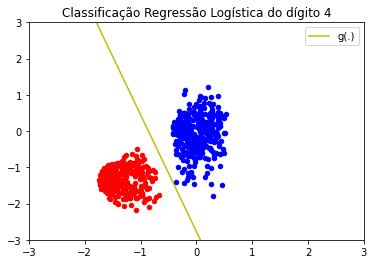

Acurácia:  1.0
modelo teste métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None
Número de iterações:  5


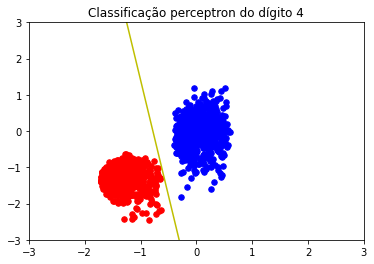

modelo treino métricas
1185 1185
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1185 1185
------------------ Matriz de confusão ------------------

[[577   0]
 [  0 608]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       608
           1       1.00      1.00      1.00       577

    accuracy                           1.00      1185
   macro avg       1.00      1.00      1.00      1185
weighted avg       1.00      1.00      1.00      1185

----------------------------------------------------------

None
Número de iterações:  1


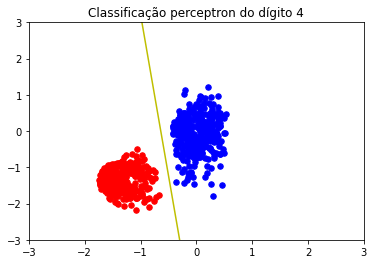

modelo teste métricas
it Numeral 4 - 9
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
606 606
------------------ Matriz de confusão ------------------

[[314   0]
 [  0 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       292
           1       1.00      1.00      1.00       314

    accuracy                           1.00       606
   macro avg       1.00      1.00      1.00       606
weighted avg       1.00      1.00      1.00       606

----------------------------------------------------------

None
�


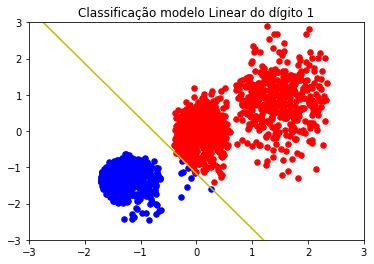

modelo treino métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1610 1610
------------------ Matriz de confusão ------------------

[[608   0]
 [  9 993]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.99      1.00      1002
           1       0.99      1.00      0.99       608

    accuracy                           0.99      1610
   macro avg       0.99      1.00      0.99      1610
weighted avg       0.99      0.99      0.99      1610

----------------------------------------------------------

None
�


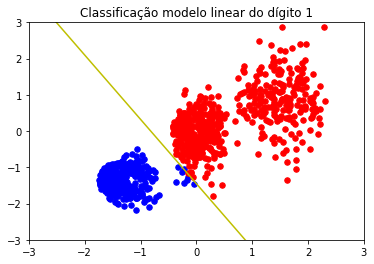

modelo teste métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
824 824
------------------ Matriz de confusão ------------------

[[292   0]
 [  8 524]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       532
           1       0.97      1.00      0.99       292

    accuracy                           0.99       824
   macro avg       0.99      0.99      0.99       824
weighted avg       0.99      0.99      0.99       824

----------------------------------------------------------

None


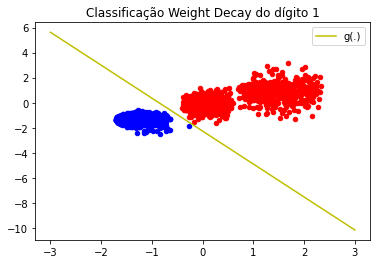

modelo treino métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1001]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1002
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None


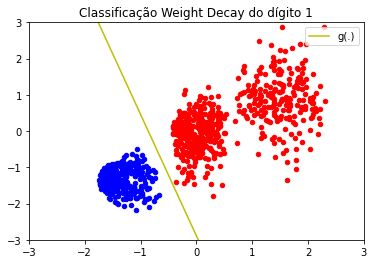

modelo teste métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
824 824
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 532]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       292

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None


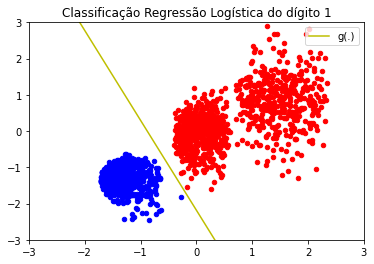

modelo treino métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   1 1001]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1002
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None


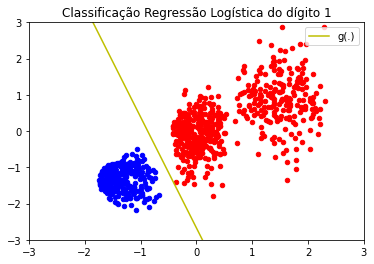

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
824 824
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 532]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       292

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None
Número de iterações:  2


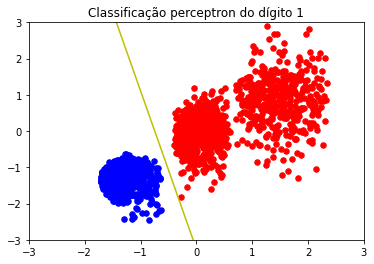

modelo treino métricas
1610 1610
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 608    0]
 [   0 1002]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00      1002
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1610
   macro avg       1.00      1.00      1.00      1610
weighted avg       1.00      1.00      1.00      1610

----------------------------------------------------------

None
Número de iterações:  2


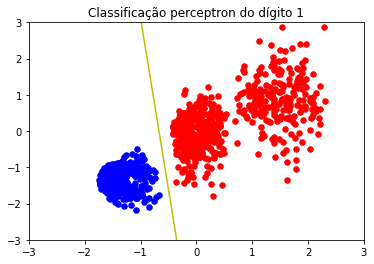

modelo teste métricas
it Numeral 1 - 10
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
824 824
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 532]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       532
           1       1.00      1.00      1.00       292

    accuracy                           1.00       824
   macro avg       1.00      1.00      1.00       824
weighted avg       1.00      1.00      1.00       824

----------------------------------------------------------

None
�


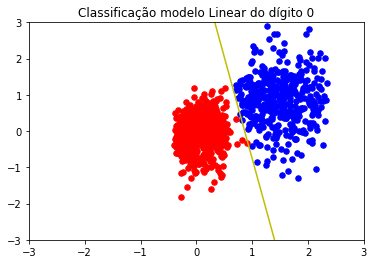

modelo treino métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
1002 1002
------------------ Matriz de confusão ------------------

[[421   4]
 [  0 577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       577
           1       1.00      0.99      1.00       425

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None
�


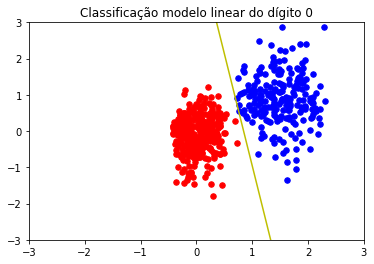

modelo teste métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1 1 1 1 1 1 1 1 1 1]
532 532
------------------ Matriz de confusão ------------------

[[216   2]
 [  0 314]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00       314
           1       1.00      0.99      1.00       218

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None


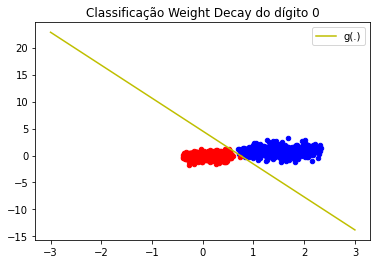

modelo treino métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1002 1002
------------------ Matriz de confusão ------------------

[[424   1]
 [  0 577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       577
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None


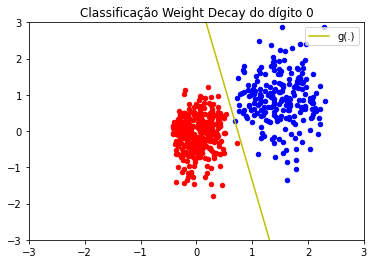

modelo teste métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
532 532
------------------ Matriz de confusão ------------------

[[217   1]
 [  0 314]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       218

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None


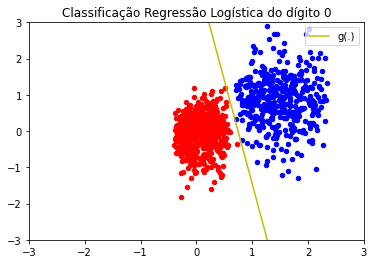

modelo treino métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1002 1002
------------------ Matriz de confusão ------------------

[[424   1]
 [  0 577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       577
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None


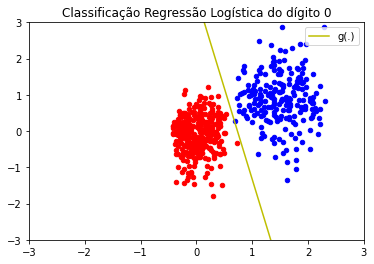

Acurácia:  0.9981203007518797
modelo teste métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
532 532
------------------ Matriz de confusão ------------------

[[217   1]
 [  0 314]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       218

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None
Número de iterações:  15


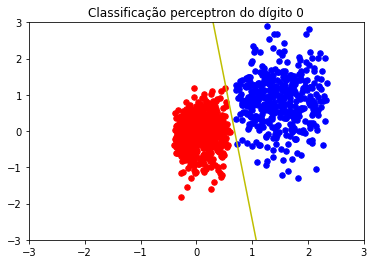

modelo treino métricas
1002 1002
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1002 1002
------------------ Matriz de confusão ------------------

[[425   0]
 [  0 577]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       577
           1       1.00      1.00      1.00       425

    accuracy                           1.00      1002
   macro avg       1.00      1.00      1.00      1002
weighted avg       1.00      1.00      1.00      1002

----------------------------------------------------------

None
Número de iterações:  12


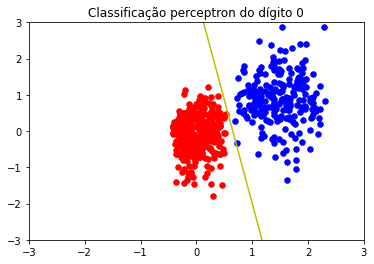

modelo teste métricas
it Numeral 0 - 10
[1 1 1 1 1 1 1 1 1 1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
532 532
------------------ Matriz de confusão ------------------

[[218   0]
 [  0 314]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       218

    accuracy                           1.00       532
   macro avg       1.00      1.00      1.00       532
weighted avg       1.00      1.00      1.00       532

----------------------------------------------------------

None
�


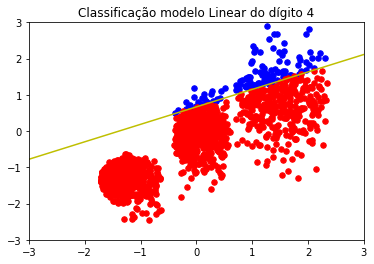

modelo treino métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1 -1 -1  1  1 -1 -1 -1]
1610 1610
------------------ Matriz de confusão ------------------

[[ 28 549]
 [101 932]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.63      0.90      0.74      1033
           1       0.22      0.05      0.08       577

    accuracy                           0.60      1610
   macro avg       0.42      0.48      0.41      1610
weighted avg       0.48      0.60      0.50      1610

----------------------------------------------------------

None
�


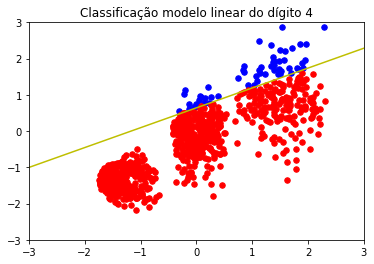

modelo teste métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1  1 -1 -1 -1  1  1 -1 -1]
824 824
------------------ Matriz de confusão ------------------

[[ 18 296]
 [ 40 470]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.61      0.92      0.74       510
           1       0.31      0.06      0.10       314

    accuracy                           0.59       824
   macro avg       0.46      0.49      0.42       824
weighted avg       0.50      0.59      0.49       824

----------------------------------------------------------

None


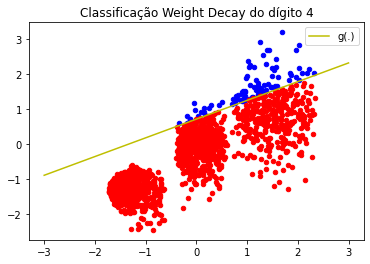

modelo treino métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1. -1. -1. -1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 18 559]
 [ 77 956]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.63      0.93      0.75      1033
           1       0.19      0.03      0.05       577

    accuracy                           0.60      1610
   macro avg       0.41      0.48      0.40      1610
weighted avg       0.47      0.60      0.50      1610

----------------------------------------------------------

None


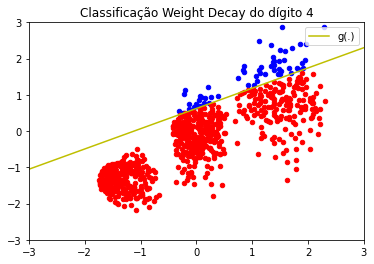

modelo teste métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1.  1. -1. -1.]
824 824
------------------ Matriz de confusão ------------------

[[ 21 293]
 [ 40 470]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.62      0.92      0.74       510
           1       0.34      0.07      0.11       314

    accuracy                           0.60       824
   macro avg       0.48      0.49      0.43       824
weighted avg       0.51      0.60      0.50       824

----------------------------------------------------------

None


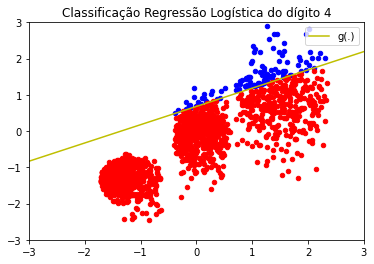

modelo treino métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1.  1.  1. -1. -1. -1.]
1610 1610
------------------ Matriz de confusão ------------------

[[ 24 553]
 [ 94 939]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.63      0.91      0.74      1033
           1       0.20      0.04      0.07       577

    accuracy                           0.60      1610
   macro avg       0.42      0.48      0.41      1610
weighted avg       0.48      0.60      0.50      1610

----------------------------------------------------------

None


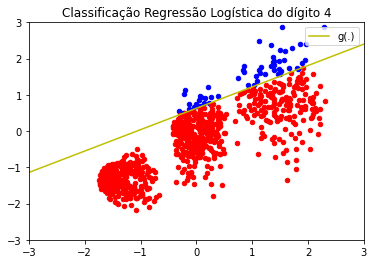

Acurácia:  0.5983009708737864
modelo teste métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1.  1. -1. -1. -1.  1.  1. -1. -1.]
824 824
------------------ Matriz de confusão ------------------

[[ 21 293]
 [ 38 472]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.62      0.93      0.74       510
           1       0.36      0.07      0.11       314

    accuracy                           0.60       824
   macro avg       0.49      0.50      0.43       824
weighted avg       0.52      0.60      0.50       824

----------------------------------------------------------

None
Número de iterações:  99


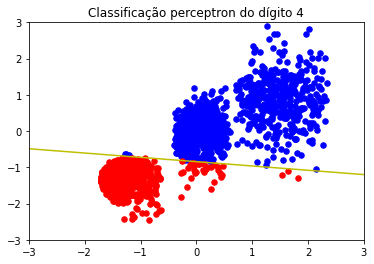

modelo treino métricas
1610 1610
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
1610 1610
------------------ Matriz de confusão ------------------

[[544  33]
 [426 607]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.95      0.59      0.73      1033
           1       0.56      0.94      0.70       577

    accuracy                           0.71      1610
   macro avg       0.75      0.77      0.71      1610
weighted avg       0.81      0.71      0.72      1610

----------------------------------------------------------

None
Número de iterações:  99


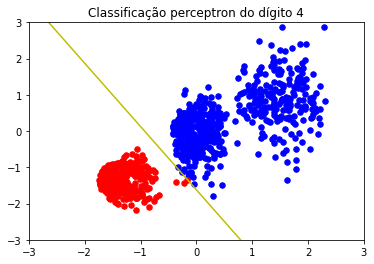

modelo teste métricas
it Numeral 4 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
824 824
------------------ Matriz de confusão ------------------

[[311   3]
 [218 292]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       0.99      0.57      0.73       510
           1       0.59      0.99      0.74       314

    accuracy                           0.73       824
   macro avg       0.79      0.78      0.73       824
weighted avg       0.84      0.73      0.73       824

----------------------------------------------------------

None
�


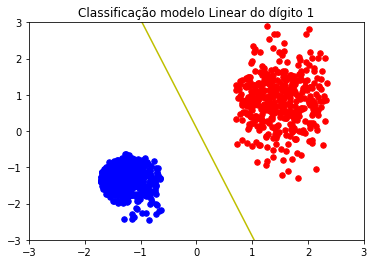

modelo treino métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None
�


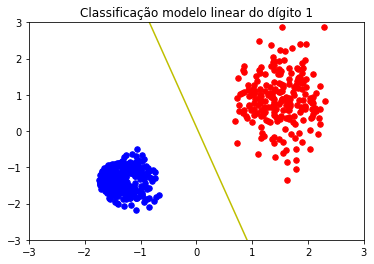

modelo teste métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None


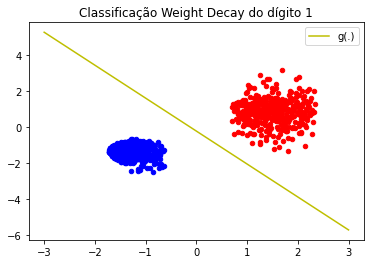

modelo treino métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None


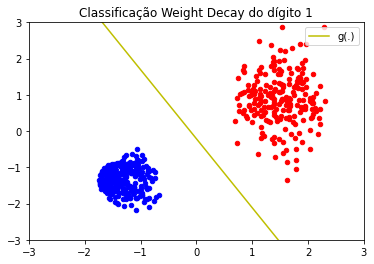

modelo teste métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None


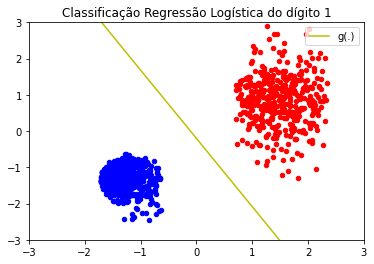

modelo treino métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None


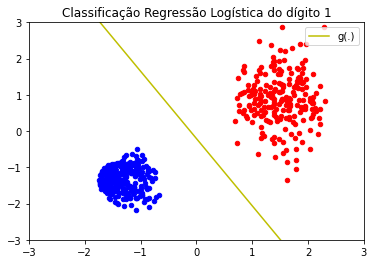

Acurácia:  1.0
modelo teste métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None
Número de iterações:  1


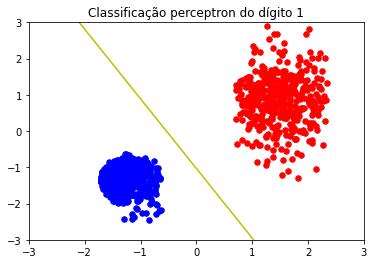

modelo treino métricas
1033 1033
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
1033 1033
------------------ Matriz de confusão ------------------

[[608   0]
 [  0 425]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       425
           1       1.00      1.00      1.00       608

    accuracy                           1.00      1033
   macro avg       1.00      1.00      1.00      1033
weighted avg       1.00      1.00      1.00      1033

----------------------------------------------------------

None
Número de iterações:  1


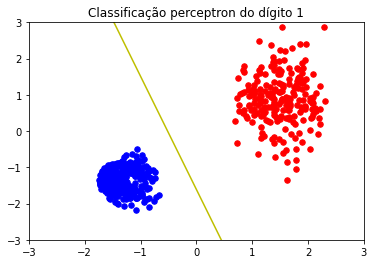

modelo teste métricas
it Numeral 1 - 11
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1] [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
510 510
------------------ Matriz de confusão ------------------

[[292   0]
 [  0 218]]

-------- Relatório de eficácia de classificação --------

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       218
           1       1.00      1.00      1.00       292

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510

----------------------------------------------------------

None
[[0, 1, 5, 4], [0, 4, 1, 5], [0, 5, 4, 1], [1, 0, 5, 4], [1, 4, 0, 5], [1, 5, 4, 0], [4, 0, 5, 1], [4, 1, 0, 5], [4, 5, 1, 0], [5, 0, 4, 1], [5, 1, 0, 4], [5, 4, 1, 0]]


In [147]:

guardaLinear = []
guardaWD = []
guardaLog = []
guardaPla = []

sequencias = []
vac= 0

i=0


for x in [0,1,4,5]: #[0,1,4]
    
    vac+=1
    indices = [0,1,4,5]
    lista_label_treino = TreinoRedimensionado
    lista_label_teste = TesteRedimensionado
    
    
    

    xtr,xts,ytr,yts = separaGenerico(lista_label_treino,lista_label_teste,x)
  
    
    glr = RegressaoLinearGenerica(xtr,xts,ytr,yts,x,i)
    gwd = WeightDecayGenerico(xtr,xts,ytr,yts,x,i)
    glog = RegressaoLogisticaGenerico(xtr,xts,ytr,yts,x,i)
    
    gpla = PocketPlaGenerico(xtr,xts,ytr,yts,x,i)
    
    
    
    
    indices.remove(x)
    #remover indice x da lista label de treino e teste na posição 0 
    lista_label_teste = [lista_label_teste[i] for i in range(len(lista_label_teste)) if lista_label_teste[i][0] != x]
    lista_label_treino = [lista_label_treino[i] for i in range(len(lista_label_treino)) if lista_label_treino[i][0] != x]
    lista_label_teste = np.array(lista_label_teste)
    lista_label_treino = np.array(lista_label_treino)
    
    lista_X_teste = lista_label_teste
    lista_X_treino = lista_label_treino
    
  
    
    
    varEscolha = -1
    for y in indices:
        
        
        
        
        
        xtr,xts,ytr,yts = separaGenerico(lista_label_treino,lista_label_teste,y)     
 
        
    
        
        glry = RegressaoLinearGenerica(xtr,xts,ytr,yts,y,i)
        glry = list(glry)
        glr = list(glr)     
        glry[1]+=glr[1]
        
        gwdy = WeightDecayGenerico(xtr,xts,ytr,yts,y,i)
        gwdy = list(gwdy)
        gwd = list(gwd)
        gwdy[1]+=gwd[1]
        glogy = RegressaoLogisticaGenerico(xtr,xts,ytr,yts,y,i)
        glogy = list(glogy)
        glog = list(glog)
        glogy[1]+=glog[1]
        gplay = PocketPlaGenerico(xtr,xts,ytr,yts,y,i)
        
        gplay = list(gplay)
        gpla = list(gpla)
        gplay[1]+=gpla[1]
        
           
        lista_label_teste = [lista_label_teste[i] for i in range(len(lista_label_teste)) if lista_label_teste[i][0] != y]
        lista_label_treino = [lista_label_treino[i] for i in range(len(lista_label_treino)) if lista_label_treino[i][0] != y]
        lista_label_teste = np.array(lista_label_teste)
        lista_label_treino = np.array(lista_label_treino)    
        
        
        
        xtr,xts,ytr,yts = separaGenerico(lista_label_treino,lista_label_teste,indices[varEscolha])
        
  
        
        glryu = RegressaoLinearGenerica(xtr,xts,ytr,yts,indices[varEscolha],i)
        
        glryu = list(glryu)
        glry = list(glry)
        glryu[1]+=glry[1]
        
        gwdyu = WeightDecayGenerico(xtr,xts,ytr,yts,indices[varEscolha],i)
        
        gwdyu = list(gwdyu)
        gwdy = list(gwdy)
        gwdyu[1]+=gwdy[1]
        
        glogyu = RegressaoLogisticaGenerico(xtr,xts,ytr,yts,indices[varEscolha],i)
        
        glogyu = list(glogyu)
        glogy = list(glogy)
        glogyu[1]+=glogy[1]
        
        
        gplayu = PocketPlaGenerico(xtr,xts,ytr,yts,indices[varEscolha],i)
        
        gplayu = list(gplayu)
        gplay = list(gplay)
        gplayu[1]+=gplay[1]
        
        guardaLinear.append(glryu[1]/3)
        guardaWD.append(gwdyu[1]/3)
        guardaLog.append(glogyu[1]/3)
        guardaPla.append(gplayu[1]/3)
        
        sequencias.append([x,y,indices[varEscolha],indices[varEscolha-1]])
        
        varEscolha += 1
        
        
        lista_label_treino = lista_X_treino
        lista_label_teste = lista_X_teste
        
    
        
        i+=1
        
        
        
        
        
        
        
        
print(sequencias)
        
        
        
        

In [148]:
len(sequencias),len(guardaLinear),len(guardaWD),len(guardaLog),len(guardaPla)

(12, 12, 12, 12, 12)

In [149]:
sequencias

[[0, 1, 5, 4],
 [0, 4, 1, 5],
 [0, 5, 4, 1],
 [1, 0, 5, 4],
 [1, 4, 0, 5],
 [1, 5, 4, 0],
 [4, 0, 5, 1],
 [4, 1, 0, 5],
 [4, 5, 1, 0],
 [5, 0, 4, 1],
 [5, 1, 0, 4],
 [5, 4, 1, 0]]

In [150]:
seq = sequencias
gl = guardaLinear
gw = guardaWD
gg = guardaLog
gp = guardaPla

In [151]:
len(seq),len(gl),len(gw),len(gg),len(gp)

(12, 12, 12, 12, 12)

In [152]:
# Percorre as 12 combinações diferente, verifica qual o melhor modelo para cada, e compara todos os melhores pra ver a melhor sequencia

melhorModeloSequenciaIndex = []

for i in range(len(sequencias)): # pega o melhor modelo de cada sequencia
    
    maximo = max(gl[i],gw[i],gg[i],gp[i])
    
    #pega o index do melhor modelo
    
    melhorModeloSequenciaIndex.append([gl[i],gw[i],gg[i],gp[i]].index(maximo))
    

# pegar qual a melhor sequencia --> já com o melhor modelo

maximo = max(melhorModeloSequenciaIndex)

seq[melhorModeloSequenciaIndex[maximo]]

[1, 0, 5, 4]